In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

#from scipy.io import arff

#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.linear_model import LogisticRegressionCV

#from sklearn.multiclass import OutputCodeClassifier,OneVsRestClassifier







In [3]:
# reading the data

df = pd.read_csv("spambase.data", header=None)

In [4]:
df

0     1     2    3     4     5     6     7     8     9   ...     48  \
0     0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
1     0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.000   
2     0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.010   
3     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
4     0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.000   
...    ...   ...   ...  ...   ...   ...   ...   ...   ...   ...  ...    ...   
4596  0.31  0.00  0.62  0.0  0.00  0.31  0.00  0.00  0.00  0.00  ...  0.000   
4597  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4598  0.30  0.00  0.30  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.102   
4599  0.96  0.00  0.00  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.000   
4600  0.00  0.00  0.65  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.000   

         49   50     51     52     53     54   55    56  57  
0     0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1     0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2     0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3     0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4     0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  
...     ...  ...    ...    ...    ...    ...  ...   ...  ..  
4596  0.232  0.0  0.000  0.000  0.000  1.142    3    88   0  
4597  0.000  0.0  0.353  0.000  0.000  1.555    4    14   0  
4598  0.718  0.0  0.000  0.000  0.000  1.404    6   118   0  
4599  0.057  0.0  0.000  0.000  0.000  1.147    5    78   0  
4600  0.000  0.0  0.125  0.000  0.000  1.250    5    40   0  

[4601 rows x 58 columns]

# Data Preprocessing

In [5]:
df.shape

(4601, 58)

In [6]:
# assign proper labels to the column

df.columns = [
    'word_freq_make',
    'word_freq_address',
    'word_freq_all',
    'word_freq_3d',
    'word_freq_our',
    'word_freq_over',
    'word_freq_remove',
    'word_freq_internet',
    'word_freq_order',
    'word_freq_mail',
    'word_freq_receive',
    'word_freq_will',
    'word_freq_people',
    'word_freq_report',
    'word_freq_addresses',
    'word_freq_free',
    'word_freq_business',
    'word_freq_email',
    'word_freq_you',
    'word_freq_credit',
    'word_freq_your',
    'word_freq_font',
    'word_freq_000',
    'word_freq_money',
    'word_freq_hp',
    'word_freq_hpl',
    'word_freq_george',
    'word_freq_650',
    'word_freq_lab',
    'word_freq_labs',
    'word_freq_telnet',
    'word_freq_857',
    'word_freq_data',
    'word_freq_415',
    'word_freq_85',
    'word_freq_technology',
    'word_freq_1999',
    'word_freq_parts',
    'word_freq_pm',
    'word_freq_direct',
    'word_freq_cs',
    'word_freq_meeting',
    'word_freq_original',
    'word_freq_project',
    'word_freq_re',
    'word_freq_edu',
    'word_freq_table',
    'word_freq_conference',
    'char_freq_;',
    'char_freq_(',
    'char_freq_[',
    'char_freq_!',
    'char_freq_$',
    'char_freq_#',
    'capital_run_length_average',
    'capital_run_length_longest',
    'capital_run_length_total',
    'spam'
]

In [7]:
df.head(5)

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1             0.00            0.94  ...         0.00        0.132   
2             0.64            0.25  ...         0.01        0.143   
3             0.31            0.63  ...         0.00        0.137   
4             0.31            0.63  ...         0.00        0.135   

   char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0          0.0        0.778        0.000        0.000   
1          0.0        0.372        0.180        0.048   
2          0.0        0.276        0.184        0.010   
3          0.0        0.137        0.000        0.000   
4          0.0        0.135        0.000        0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       3.756                          61   
1                       5.114                         101   
2                       9.821                         485   
3                       3.537                          40   
4                       3.537                          40   

   capital_run_length_total  spam  
0                       278     1  
1                      1028     1  
2                      2259     1  
3                       191     1  
4                       191     1  

[5 rows x 58 columns]

In [8]:
df.tail()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
4596            0.31                0.0           0.62           0.0   
4597            0.00                0.0           0.00           0.0   
4598            0.30                0.0           0.30           0.0   
4599            0.96                0.0           0.00           0.0   
4600            0.00                0.0           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
4596           0.00            0.31               0.0                 0.0   
4597           0.00            0.00               0.0                 0.0   
4598           0.00            0.00               0.0                 0.0   
4599           0.32            0.00               0.0                 0.0   
4600           0.00            0.00               0.0                 0.0   

      word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
4596              0.0             0.0  ...        0.000        0.232   
4597              0.0             0.0  ...        0.000        0.000   
4598              0.0             0.0  ...        0.102        0.718   
4599              0.0             0.0  ...        0.000        0.057   
4600              0.0             0.0  ...        0.000        0.000   

      char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
4596          0.0        0.000          0.0          0.0   
4597          0.0        0.353          0.0          0.0   
4598          0.0        0.000          0.0          0.0   
4599          0.0        0.000          0.0          0.0   
4600          0.0        0.125          0.0          0.0   

      capital_run_length_average  capital_run_length_longest  \
4596                       1.142                           3   
4597                       1.555                           4   
4598                       1.404                           6   
4599                       1.147                           5   
4600                       1.250                           5   

      capital_run_length_total  spam  
4596                        88     0  
4597                        14     0  
4598                       118     0  
4599                        78     0  
4600                        40     0  

[5 rows x 58 columns]

In [9]:
# check if there are some nan values in the dataset

df.isnull().any()

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

In [10]:
# check if there are dublicates in data

df[df.duplicated() == True]

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
26               0.0                0.0           0.00           0.0   
103              0.0                0.0           0.64           0.0   
104              0.0                0.0           0.00           0.0   
105              0.0                0.0           0.64           0.0   
106              0.0                0.0           0.00           0.0   
...              ...                ...            ...           ...   
4439             0.0                0.0           0.74           0.0   
4441             0.0                0.0           0.74           0.0   
4537             0.0                0.0           0.00           0.0   
4541             0.0                0.0           0.00           0.0   
4550             0.0                0.0           0.00           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
26              0.0            0.00               0.0                 0.0   
103             0.0            0.64               0.0                 0.0   
104             0.0            0.00               0.0                 0.0   
105             0.0            0.64               0.0                 0.0   
106             0.0            0.00               0.0                 0.0   
...             ...             ...               ...                 ...   
4439            0.0            0.00               0.0                 0.0   
4441            0.0            0.00               0.0                 0.0   
4537            0.0            0.00               0.0                 0.0   
4541            0.0            0.00               0.0                 0.0   
4550            0.0            0.00               0.0                 0.0   

      word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
26                0.0             0.0  ...        0.000        0.196   
103               0.0             0.0  ...        0.094        0.189   
104               0.0             0.0  ...        0.305        0.611   
105               0.0             0.0  ...        0.094        0.189   
106               0.0             0.0  ...        0.305        0.611   
...               ...             ...  ...          ...          ...   
4439              0.0             0.0  ...        0.036        0.147   
4441              0.0             0.0  ...        0.036        0.147   
4537              0.0             0.0  ...        0.000        0.000   
4541              0.0             0.0  ...        0.000        0.000   
4550              0.0             0.0  ...        0.000        0.000   

      char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
26          0.000        0.392        0.196          0.0   
103         0.284        0.662        0.000          0.0   
104         0.000        1.529        0.000          0.0   
105         0.284        0.662        0.000          0.0   
106         0.000        1.529        0.000          0.0   
...           ...          ...          ...          ...   
4439        0.000        0.147        0.000          0.0   
4441        0.000        0.147        0.000          0.0   
4537        0.000        0.000        0.000          0.0   
4541        0.000        0.000        0.000          0.0   
4550        0.000        0.000        0.000          0.0   

      capital_run_length_average  capital_run_length_longest  \
26                         5.466                          22   
103                       10.068                         131   
104                        5.500                          22   
105                       10.068                         131   
106                        5.500                          22   
...                          ...                         ...   
4439                       2.587                          55   
4441                       2.587                          55   
4537                       1.000                      

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00                0.00   
1              0.14            0.28              0.21                0.07   
2              1.23            0.19              0.19                0.12   
3              0.63            0.00              0.31                0.63   
4              0.63            0.00              0.31                0.63   
...             ...             ...               ...                 ...   
4596           0.00            0.31              0.00                0.00   
4597           0.00            0.00              0.00                0.00   
4598           0.00            0.00              0.00                0.00   
4599           0.32            0.00              0.00                0.00   
4600           0.00            0.00              0.00                0.00   

      word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0                0.00            0.00  ...        0.000        0.000   
1                0.00            0.94  ...        0.000        0.132   
2                0.64            0.25  ...        0.010        0.143   
3                0.31            0.63  ...        0.000        0.137   
4                0.31            0.63  ...        0.000        0.135   
...               ...             ...  ...          ...          ...   
4596             0.00            0.00  ...        0.000        0.232   
4597             0.00            0.00  ...        0.000        0.000   
4598             0.00            0.00  ...        0.102        0.718   
4599             0.00            0.00  ...        0.000        0.057   
4600             0.00            0.00  ...        0.000        0.000   

      char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0             0.0        0.778        0.000        0.000   
1             0.0        0.372        0.180        0.048   
2             0.0        0.276        0.184        0.010   
3             0.0        0.137        0.000        0.000   
4             0.0        0.135        0.000        0.000   
...           ...          ...          ...          ...   
4596          0.0        0.000        0.000        0.000   
4597          0.0        0.353        0.000        0.000   
4598          0.0        0.000        0.000        0.000   
4599          0.0        0.000        0.000        0.000   
4600          0.0        0.125        0.000        0.000   

      capital_run_length_average  capital_run_length_longest  \
0                          3.756                          61   
1                          5.114                         101   
2                          9.821                         485   
3                          3.537                          40   
4                          3.537                          40   
...                          ...                         ...   
4596                       1.142                           3   
4597                       1.555                           4   
4598                       1.404                      

In [13]:
df.shape

(4210, 58)

In [14]:
# Setting the spam value to 0 if the "word_freq_george" or the "word_freq_650" columns are greater than 0.0
# Reason: In the documentation(spambase.DOCUMENTATION) it has clearly mentioned it

df.loc[(df['word_freq_george'] > 0) | (df['word_freq_650'] > 0), 'spam'] = 0

In [15]:
# Let's have a look at the dataset and check if its updated or not

df_subset = df.loc[:, ['word_freq_george', 'word_freq_650', 'spam']]
df_subset

word_freq_george  word_freq_650  spam
0                  0.0            0.0     1
1                  0.0            0.0     1
2                  0.0            0.0     1
3                  0.0            0.0     1
4                  0.0            0.0     1
...                ...            ...   ...
4596               0.0            0.0     0
4597               0.0            0.0     0
4598               0.0            0.0     0
4599               0.0            0.0     0
4600               0.0            0.0     0

[4210 rows x 3 columns]

In [16]:
# Save the modified dataframe to a new csv file

df.to_csv('modified_dataset.csv', index=False)

In [17]:
# Creating a reference to the updated dataset

df_new = pd.read_csv('modified_dataset.csv', header=0)
df_new.head()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1             0.00            0.94  ...         0.00        0.132   
2             0.64            0.25  ...         0.01        0.143   
3             0.31            0.63  ...         0.00        0.137   
4             0.31            0.63  ...         0.00        0.135   

   char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0          0.0        0.778        0.000        0.000   
1          0.0        0.372        0.180        0.048   
2          0.0        0.276        0.184        0.010   
3          0.0        0.137        0.000        0.000   
4          0.0        0.135        0.000        0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       3.756                          61   
1                       5.114                         101   
2                       9.821                         485   
3                       3.537                          40   
4                       3.537                          40   

   capital_run_length_total  spam  
0                       278     1  
1                      1028     1  
2                      2259     1  
3                       191     1  
4                       191     1  

[5 rows x 58 columns]

In [18]:
df_new.shape

(4210, 58)

# Correlation

In [19]:
# calculate correlation matrix

tmp=df_new.corr()

In [20]:
tmp

word_freq_make  word_freq_address  word_freq_all  \
word_freq_make                    1.000000           0.034012       0.063207   
word_freq_address                 0.034012           1.000000       0.027789   
word_freq_all                     0.063207           0.027789       1.000000   
word_freq_3d                      0.005388          -0.008947      -0.019901   
word_freq_our                     0.021740           0.036975       0.065676   
word_freq_over                    0.055067           0.005526       0.066547   
word_freq_remove                  0.011061           0.077374       0.028581   
word_freq_internet               -0.004370           0.013706       0.007221   
word_freq_order                   0.103842           0.053426       0.077561   
word_freq_mail                    0.040829           0.184304       0.025138   
word_freq_receive                 0.063031           0.060724       0.055647   
word_freq_will                    0.075911           0.026247       0.065733   
word_freq_people                  0.061985           0.015538       0.036431   
word_freq_report                  0.032263           0.012414       0.004900   
word_freq_addresses               0.022454           0.061826       0.104574   
word_freq_free                    0.065443           0.046630       0.061937   
word_freq_business                0.081471           0.022018       0.029834   
word_freq_email                   0.051571           0.178853       0.110794   
word_freq_you                     0.120563           0.055876       0.126502   
word_freq_credit                  0.020924          -0.006735       0.030874   
word_freq_your                    0.121458           0.117797       0.147895   
word_freq_font                   -0.025574           0.001214      -0.039464   
word_freq_000                     0.126478           0.007064       0.106694   
word_freq_money                   0.205689           0.061282       0.031150   
word_freq_hp                     -0.075054          -0.053573      -0.092684   
word_freq_hpl                    -0.063467          -0.044627      -0.066464   
word_freq_george                 -0.048086          -0.011228      -0.081297   
word_freq_650                    -0.050054          -0.033000      -0.051471   
word_freq_lab                    -0.041541          -0.026048      -0.057847   
word_freq_labs                   -0.054241          -0.029419      -0.030519   
word_freq_telnet                 -0.038899          -0.015937      -0.036610   
word_freq_857                    -0.031634           0.028852      -0.063579   
word_freq_data                   -0.042715          -0.032575      -0.058002   
word_freq_415                    -0.026322           0.026039      -0.063417   
word_freq_85                     -0.046083          -0.025524      -0.048968   
word_freq_technology             -0.057296          -0.028262      -0.047593   
word_freq_1999                   -0.058771           0.003749      -0.074329   
word_freq_parts                  -0.008626          -0.012708       0.031756   
word_freq_pm                     -0.011199          -0.016208      -0.017418   
word_freq_direct                 -0.035467           0.002326      -0.046013   
word_freq_cs                     -0.005280          -0.019350      -0.030822   
word_freq_meeting                -0.026546          -0.035908      -0.007620   
word_freq_original               -0.025603           0.037681      -0.052736   
word_freq_project                -0.022980          -0.029055      -0.056883   
word_freq_re                     -0.037848           0.020029      -0.056600   
word_freq_edu                    -0.034455          -0.026004      -0.060558   
word_freq_table                  -0.000950          -0.012337       0.027384   
word_freq_conference             -0.018904          -0.020947      -0.029465   
char_freq_;                      -0.027248           0.014735      -0.036778   
char_freq_(                 

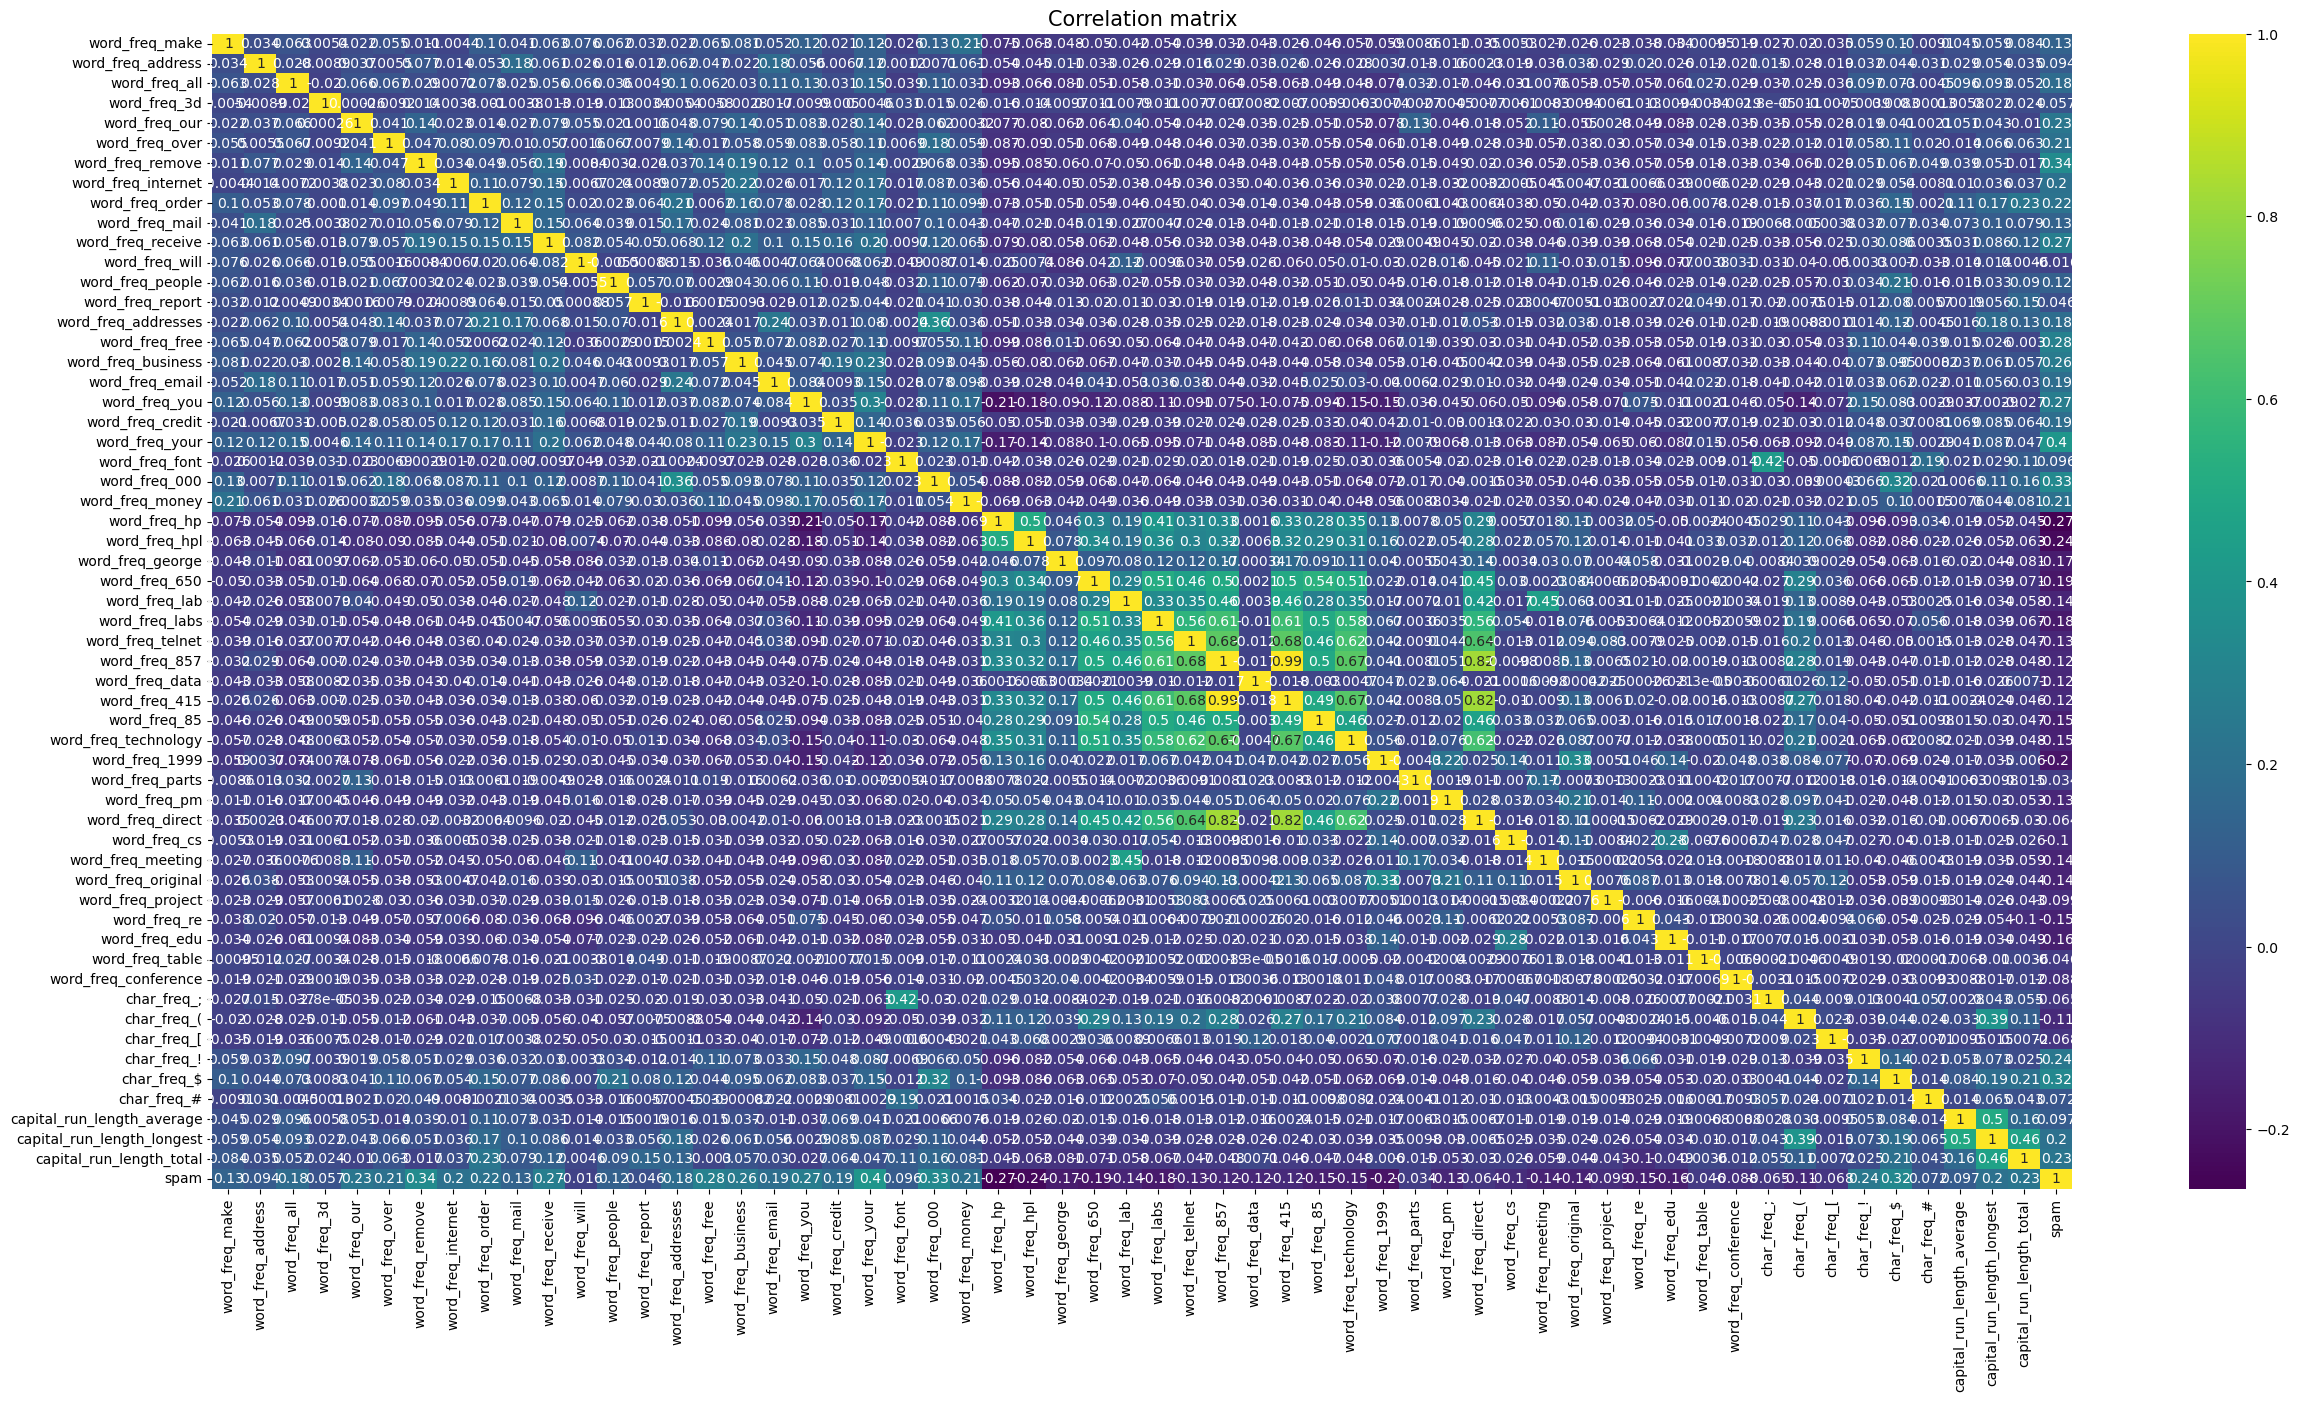

In [21]:
# plot correlation matrix

plt.figure(figsize=(30, 15))
sns.heatmap(tmp, annot=True, cmap='viridis')
plt.title("Correlation matrix", size=15)
plt.show()

In [22]:
mask = np.ones(tmp.shape, dtype=bool)
np.fill_diagonal(mask, 0)

index_i, index_j = np.where((abs(tmp) > 0.7) & mask)
print(index_i, index_j)  

[31 31 33 33 39 39] [33 39 31 39 31 33]


In [23]:
# chosen columns with high correlation between them

In [24]:
df_new.columns[31]

'word_freq_857'

In [25]:
df_new.columns[33]

'word_freq_415'

In [26]:
df_new.columns[39]

'word_freq_direct'

In [27]:
# values of the pairwise correlation between chosen columns

In [28]:
tmp['word_freq_857']['word_freq_415']

0.9948748363313183

In [29]:
tmp['word_freq_857']['word_freq_direct']

0.8242064307509771

In [30]:
tmp['word_freq_415']['word_freq_direct']

0.8208365438979347

In [31]:
#Get rid of strongly correlated features features(corr > 0.7)
df_no_strong_corr = df_new.drop(columns=['word_freq_857', 'word_freq_415']) #  save only column 'word_freq_direct'

In [32]:
df_no_strong_corr

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4205            0.31               0.00           0.62           0.0   
4206            0.00               0.00           0.00           0.0   
4207            0.30               0.00           0.30           0.0   
4208            0.96               0.00           0.00           0.0   
4209            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00                0.00   
1              0.14            0.28              0.21                0.07   
2              1.23            0.19              0.19                0.12   
3              0.63            0.00              0.31                0.63   
4              0.63            0.00              0.31                0.63   
...             ...             ...               ...                 ...   
4205           0.00            0.31              0.00                0.00   
4206           0.00            0.00              0.00                0.00   
4207           0.00            0.00              0.00                0.00   
4208           0.32            0.00              0.00                0.00   
4209           0.00            0.00              0.00                0.00   

      word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0                0.00            0.00  ...        0.000        0.000   
1                0.00            0.94  ...        0.000        0.132   
2                0.64            0.25  ...        0.010        0.143   
3                0.31            0.63  ...        0.000        0.137   
4                0.31            0.63  ...        0.000        0.135   
...               ...             ...  ...          ...          ...   
4205             0.00            0.00  ...        0.000        0.232   
4206             0.00            0.00  ...        0.000        0.000   
4207             0.00            0.00  ...        0.102        0.718   
4208             0.00            0.00  ...        0.000        0.057   
4209             0.00            0.00  ...        0.000        0.000   

      char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0             0.0        0.778        0.000        0.000   
1             0.0        0.372        0.180        0.048   
2             0.0        0.276        0.184        0.010   
3             0.0        0.137        0.000        0.000   
4             0.0        0.135        0.000        0.000   
...           ...          ...          ...          ...   
4205          0.0        0.000        0.000        0.000   
4206          0.0        0.353        0.000        0.000   
4207          0.0        0.000        0.000        0.000   
4208          0.0        0.000        0.000        0.000   
4209          0.0        0.125        0.000        0.000   

      capital_run_length_average  capital_run_length_longest  \
0                          3.756                          61   
1                          5.114                         101   
2                          9.821                         485   
3                          3.537                          40   
4                          3.537                          40   
...                          ...                         ...   
4205                       1.142                           3   
4206                       1.555                           4   
4207                       1.404                      

# Principal Component Analysis

In [33]:
df_no_result = df_new.drop(columns=['spam'])
df_no_result

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4205            0.31               0.00           0.62           0.0   
4206            0.00               0.00           0.00           0.0   
4207            0.30               0.00           0.30           0.0   
4208            0.96               0.00           0.00           0.0   
4209            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00                0.00   
1              0.14            0.28              0.21                0.07   
2              1.23            0.19              0.19                0.12   
3              0.63            0.00              0.31                0.63   
4              0.63            0.00              0.31                0.63   
...             ...             ...               ...                 ...   
4205           0.00            0.31              0.00                0.00   
4206           0.00            0.00              0.00                0.00   
4207           0.00            0.00              0.00                0.00   
4208           0.32            0.00              0.00                0.00   
4209           0.00            0.00              0.00                0.00   

      word_freq_order  word_freq_mail  ...  word_freq_conference  char_freq_;  \
0                0.00            0.00  ...                   0.0        0.000   
1                0.00            0.94  ...                   0.0        0.000   
2                0.64            0.25  ...                   0.0        0.010   
3                0.31            0.63  ...                   0.0        0.000   
4                0.31            0.63  ...                   0.0        0.000   
...               ...             ...  ...                   ...          ...   
4205             0.00            0.00  ...                   0.0        0.000   
4206             0.00            0.00  ...                   0.0        0.000   
4207             0.00            0.00  ...                   0.0        0.102   
4208             0.00            0.00  ...                   0.0        0.000   
4209             0.00            0.00  ...                   0.0        0.000   

      char_freq_(  char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0           0.000          0.0        0.778        0.000        0.000   
1           0.132          0.0        0.372        0.180        0.048   
2           0.143          0.0        0.276        0.184        0.010   
3           0.137          0.0        0.137        0.000        0.000   
4           0.135          0.0        0.135        0.000        0.000   
...           ...          ...          ...          ...          ...   
4205        0.232          0.0        0.000        0.000        0.000   
4206        0.000          0.0        0.353        0.000        0.000   
4207        0.718          0.0        0.000        0.000        0.000   
4208        0.057          0.0        0.000        0.000        0.000   
4209        0.000          0.0        0.125        0.000        0.000   

      capital_run_length_average  capital_run_length_longest  \
0                          3.756                          61   
1                          5.114                         101   
2                          9.821                         485   
3                          3.537                          40   
4                          3.537              

[9.25462065e-01 7.25629100e-02 1.91461432e-03 1.02875405e-05
 7.15869294e-06 5.96782175e-06 4.31590592e-06 3.07457811e-06
 2.73159675e-06 2.46163242e-06 2.11290981e-06 1.90636110e-06
 1.72724850e-06 1.64308037e-06 1.50736343e-06 1.34005518e-06
 1.16687103e-06 1.03369632e-06 1.01243813e-06 9.52763138e-07
 7.57641539e-07 7.25788657e-07 6.35887081e-07 5.75891847e-07
 5.33960598e-07 4.76671425e-07 4.57508621e-07 4.31542161e-07
 4.16740556e-07 4.10568496e-07 3.57953898e-07 3.38915601e-07
 3.20421376e-07 3.08329755e-07 3.00286908e-07 2.92316036e-07
 2.71169521e-07 2.19920684e-07 2.13145284e-07 2.06615265e-07
 1.89324337e-07 1.82948369e-07 1.68738111e-07 1.58640023e-07
 1.35989480e-07 1.28461400e-07 1.23951443e-07 1.16142036e-07
 1.13121533e-07 9.93898839e-08 9.57798795e-08 8.78333342e-08
 6.65111050e-08 5.09265681e-08 2.50704607e-08 1.46002097e-08
 1.07371893e-09]
1.0000000000000002


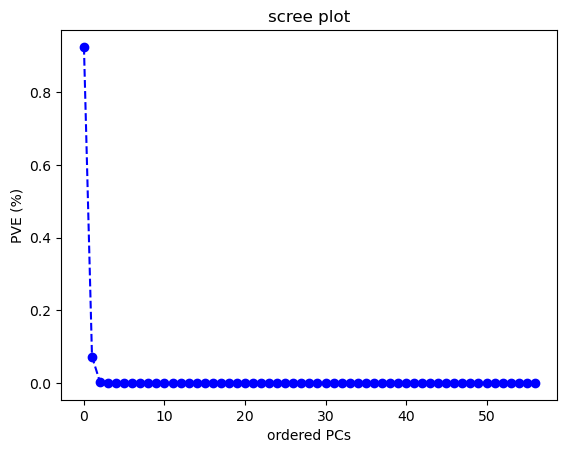

In [34]:
pca_model = PCA(n_components=57)
pca_coordinates = pca_model.fit_transform(df_no_result)
plt.plot(pca_model.explained_variance_ratio_, linestyle='--', marker='o', color='b')
plt.title('scree plot')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
print(pca_model.explained_variance_ratio_)
print(np.sum(pca_model.explained_variance_ratio_[:]))

[9.25462065e-01 7.25629100e-02 1.91461432e-03 1.02875405e-05]
0.9999498772079002


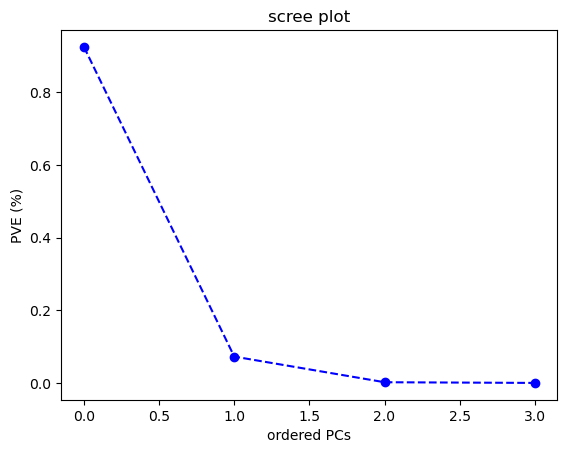

In [35]:
pca_model = PCA(n_components=4)
pca_coordinates = pca_model.fit_transform(df_no_result)
plt.plot(pca_model.explained_variance_ratio_, linestyle='--', marker='o', color='b')
plt.title('scree plot')
plt.xlabel('ordered PCs')
plt.ylabel('PVE (%)')
print(pca_model.explained_variance_ratio_)
print(np.sum(pca_model.explained_variance_ratio_[:]))

In [36]:
df_pca = pd.DataFrame(pca_coordinates)
df_pca.rename({0:'Component1', 1:'Component2', 2:'Component3', 3:'Component4'}, axis=1, inplace=True)
df_pca['Result'] = df_new['spam']
df_pca

Component1  Component2  Component3  Component4  Result
0      -11.600978   10.680921   -2.502124   -0.809472       1
1      735.050164  -70.631211   -1.008541   -1.839827       1
2     2011.760589  108.977003  -25.300167    0.078987       1
3     -100.843543    4.030041   -1.237882   -1.394402       1
4     -100.843544    4.030039   -1.237879   -1.394299       1
...           ...         ...         ...         ...     ...
4205  -208.470738  -15.967542   -0.745520    0.291853       0
4206  -281.339988   -3.032358   -0.816279   -3.541935       0
4207  -178.377573  -17.824756   -0.611699   -0.338601       0
4208  -218.018609  -12.391679   -0.977085   -0.554278       0
4209  -255.521900   -6.264065   -1.075588   -2.334811       0

[4210 rows x 5 columns]

## Selecting best important features using SelectFromModel

In [37]:
X = df_no_result
y = df_new['spam']
sfm_selector = SelectFromModel(estimator=DecisionTreeClassifier())
sfm_selector.fit(X, y)
X.columns[sfm_selector.get_support()]

Index(['word_freq_our', 'word_freq_remove', 'word_freq_internet',
       'word_freq_free', 'word_freq_you', 'word_freq_hp', 'word_freq_george',
       'word_freq_edu', 'char_freq_!', 'char_freq_$',
       'capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total'],
      dtype='object')

In [38]:
df_SFM = df_new[['word_freq_remove', 'word_freq_internet', 'word_freq_free',
       'word_freq_hp', 'word_freq_george', 'word_freq_edu', 'char_freq_!',
       'char_freq_$', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'spam']]
df_SFM

word_freq_remove  word_freq_internet  word_freq_free  word_freq_hp  \
0                 0.00                0.00            0.32           0.0   
1                 0.21                0.07            0.14           0.0   
2                 0.19                0.12            0.06           0.0   
3                 0.31                0.63            0.31           0.0   
4                 0.31                0.63            0.31           0.0   
...                ...                 ...             ...           ...   
4205              0.00                0.00            0.00           0.0   
4206              0.00                0.00            0.00           0.0   
4207              0.00                0.00            0.00           0.0   
4208              0.00                0.00            0.00           0.0   
4209              0.00                0.00            0.00           0.0   

      word_freq_george  word_freq_edu  char_freq_!  char_freq_$  \
0                  0.0           0.00        0.778        0.000   
1                  0.0           0.00        0.372        0.180   
2                  0.0           0.06        0.276        0.184   
3                  0.0           0.00        0.137        0.000   
4                  0.0           0.00        0.135        0.000   
...                ...            ...          ...          ...   
4205               0.0           0.31        0.000        0.000   
4206               0.0           2.00        0.353        0.000   
4207               0.0           1.20        0.000        0.000   
4208               0.0           0.32        0.000        0.000   
4209               0.0           0.65        0.125        0.000   

      capital_run_length_average  capital_run_length_longest  \
0                          3.756                          61   
1                          5.114                         101   
2                          9.821                         485   
3                          3.537                          40   
4                          3.537                          40   
...                          ...                         ...   
4205                       1.142                           3   
4206                       1.555                           4   
4207                       1.404                           6   
4208                       1.147                           5   
4209                       1.250                           5   

      capital_run_length_total  spam  
0                          278     1  
1                         1028     1  
2                         2259     1  
3                          191     1  
4                          191     1  
...                        ...   ...  
4205                        88     0  
4206                        14     0  
4207                       118     0  
4208                        78     0  
4209                        40     0  

[4210 rows x 12 columns]

# Divide dataset into training and testing sets

In [39]:
np.random.seed(42)

# if we take all dataset for further analysis

X_for_corr = df_no_result
X_for_corr
y_for_corr = df_new['spam']
X_train_for_corr, X_test_for_corr, y_train_for_corr, y_test_for_corr = train_test_split(X_for_corr, y_for_corr, test_size=0.33)

In [40]:
# if we take dataset without very correlated features for further analysis

X_no_strong_corr = df_no_strong_corr.drop('spam', axis = 1)
y_no_strong_corr = df_no_strong_corr['spam']
X_train_no_corr, X_test_no_corr, y_train_no_corr, y_test_no_corr = train_test_split(X_no_strong_corr, y_no_strong_corr, test_size=0.33)
  

In [41]:
# if we take principal components vectors for further analysis

X_pca = df_pca.drop('Result', axis = 1)
y_pca = df_pca['Result']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.33)
   

In [42]:
# if we take features chosen by SelectFromModel for further analysis

X_SFM = df_SFM.drop('spam', axis = 1)
y_SFM = df_SFM['spam']
X_train_SFM, X_test_SFM, y_train_SFM, y_test_SFM = train_test_split(X_SFM, y_SFM, test_size=0.33)
 

# Decision Tree

### Include all features

In [385]:
data = df_no_result
target = df_new['spam']
feat_names = df_new.columns
targ_names = ['spam', 'not spam']
print(data.shape)


X_train, X_test, y_train, y_test = X_train_for_corr, X_test_for_corr, y_train_for_corr, y_test_for_corr 
print(X_train.shape)

tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(X_train, y_train)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)

training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)

print(f'training accuracy: {training_acc}\ntesting accuracy: {testing_acc}')

(4210, 57)
(2820, 57)
training accuracy: 0.999290780141844
testing accuracy: 0.8935251798561151


In [386]:
print('Depth is',tree_model.tree_.max_depth + 1)
print('Number of leafes:', tree_model.tree_.n_leaves)

Depth is 20
Number of leafes: 169


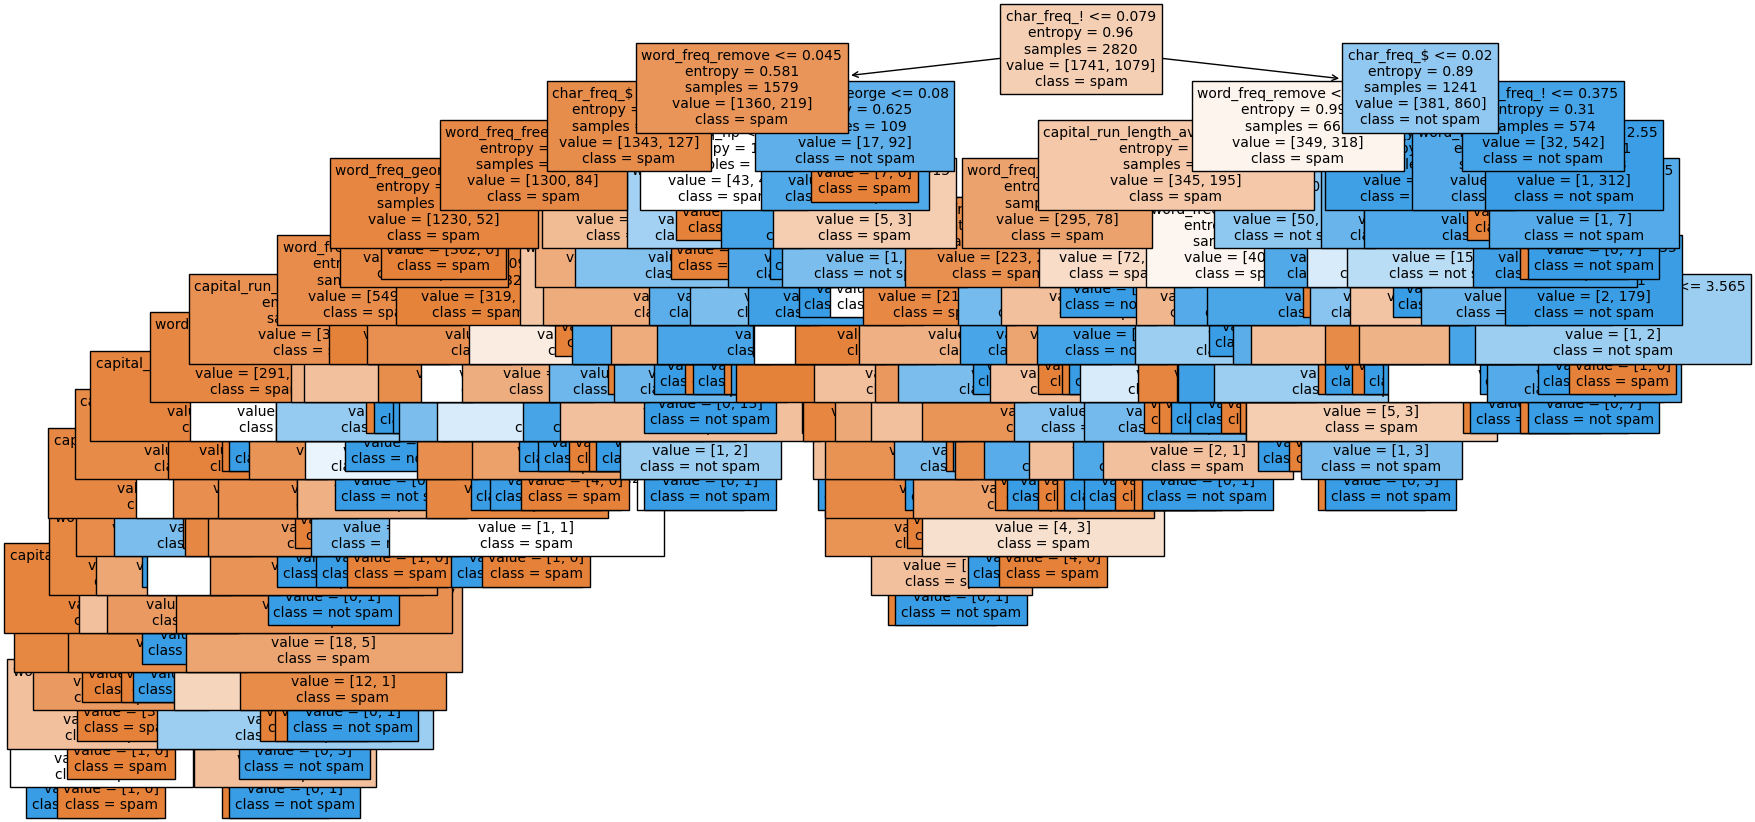

In [387]:
fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

Apply the pruning by penalizing the tree complexity with the optional parameter cpp .........................

Train a classification tree with pruning with grid-search cross-validation on the complexity parameter (in order to avoid overfitting)

In [388]:
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00026769 0.00044153 0.00046101 0.00052934 0.0006379
 0.00070922 0.00070922 0.00070922 0.0008948  0.00097691 0.00097691
 0.00097691 0.00097691 0.00097691 0.00097691 0.00097691 0.00097691
 0.00097691 0.00106383 0.00106383 0.00109305 0.00110749 0.00114333
 0.00115075 0.00115075 0.00115075 0.00115075 0.00115075 0.00115075
 0.00123648 0.00125792 0.00128001 0.00129485 0.00129503 0.00130792
 0.00132196 0.00132459 0.00138041 0.00139712 0.00141844 0.00146537
 0.00151923 0.0015287  0.00154203 0.00154203 0.0015542  0.00155687
 0.00155687 0.00157692 0.00158334 0.00161933 0.00164655 0.0016631
 0.00169535 0.00171007 0.00174587 0.00178914 0.00180361 0.001843
 0.001843   0.00187957 0.00190847 0.0019457  0.00195382 0.00196575
 0.00197226 0.00197336 0.00206813 0.0021425  0.00214672 0.00218421
 0.002191   0.0021987  0.00220195 0.00222536 0.00223684 0.002243
 0.00225891 0.00226756 0.00233832 0.00236005 0.00243895 0.00263947
 0.00273327 0.00273611 0.00290209 0.00313161 0.00332038 0.00332378
 

In [389]:
# For each alpha we will append our model to a list

tree_models = []
for ccp_alpha in ccp_alphas:
    tree_model = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha=ccp_alpha)
    tree_model.fit(X_train, y_train)
    tree_models.append(tree_model)    

We will remove the last element in tree_models and ccp_alphas, because it is the trivial tree with only one node.

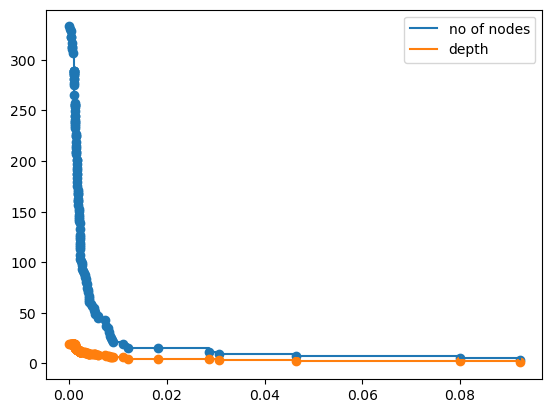

In [390]:
tree_models = tree_models[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [tree_model.tree_.node_count for tree_model in tree_models]
depth = [tree_model.tree_.max_depth for tree_model in tree_models]

plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

Observation: As alpha increases number of nodes and depth decreases

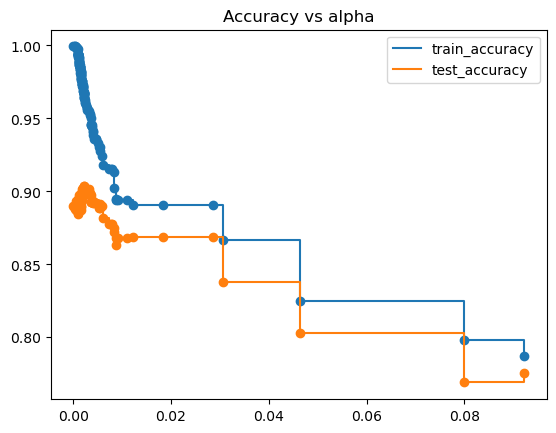

In [391]:
train_acc = []
test_acc = []
for t in tree_models:
    y_train_pred = t.predict(X_train)
    y_test_pred = t.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We can choose alpha = 0.007????????

Now we can obtain pruned decision tree with less amount of leaves and less depth

In [392]:
tree_model_pruned = tree.DecisionTreeClassifier(criterion = 'entropy',ccp_alpha = 0.007)
tree_model_pruned.fit(X_train,y_train)
y_train_pred = tree_model_pruned.predict(X_train)
y_test_pred = tree_model_pruned.predict(X_test)

In [393]:
# helper function

def plot_confusionmatrix(y_train_pred, y_train, dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf, annot = True, yticklabels = targ_names,
                xticklabels = targ_names, cmap = 'Blues', fmt = 'g')
    plt.tight_layout()
    plt.show()

Train Confusion matrix


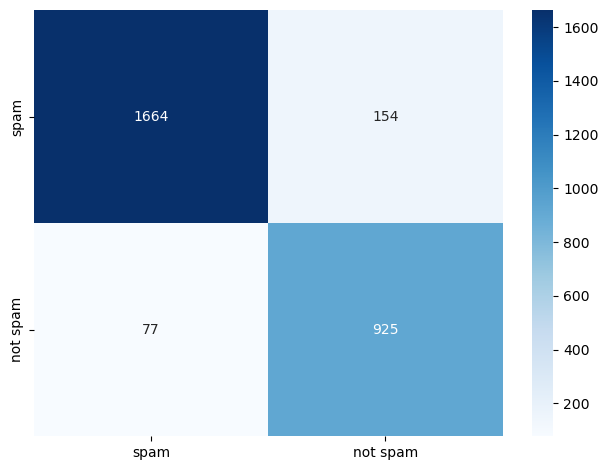

Test Confusion matrix


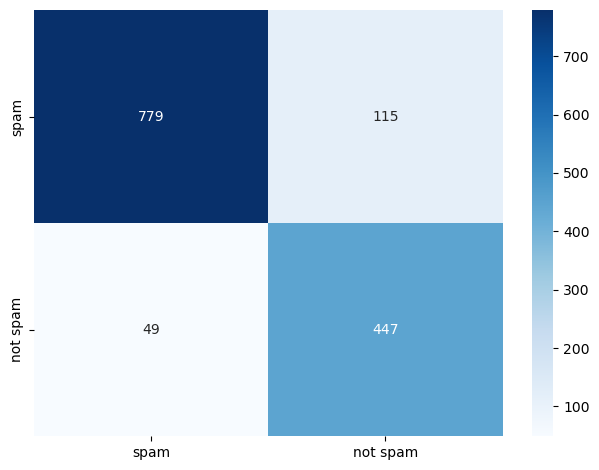

In [394]:
plot_confusionmatrix(y_train_pred,y_train,dom = 'Train')
plot_confusionmatrix(y_test_pred,y_test,dom = 'Test')

In [395]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

Train score 0.9180851063829787
Test score 0.8820143884892087


In [396]:
print('Depth is',tree_model_pruned.tree_.max_depth + 1)
print('Number of leafes ', tree_model_pruned.tree_.n_leaves)

Depth is 9
Number of leafes  23


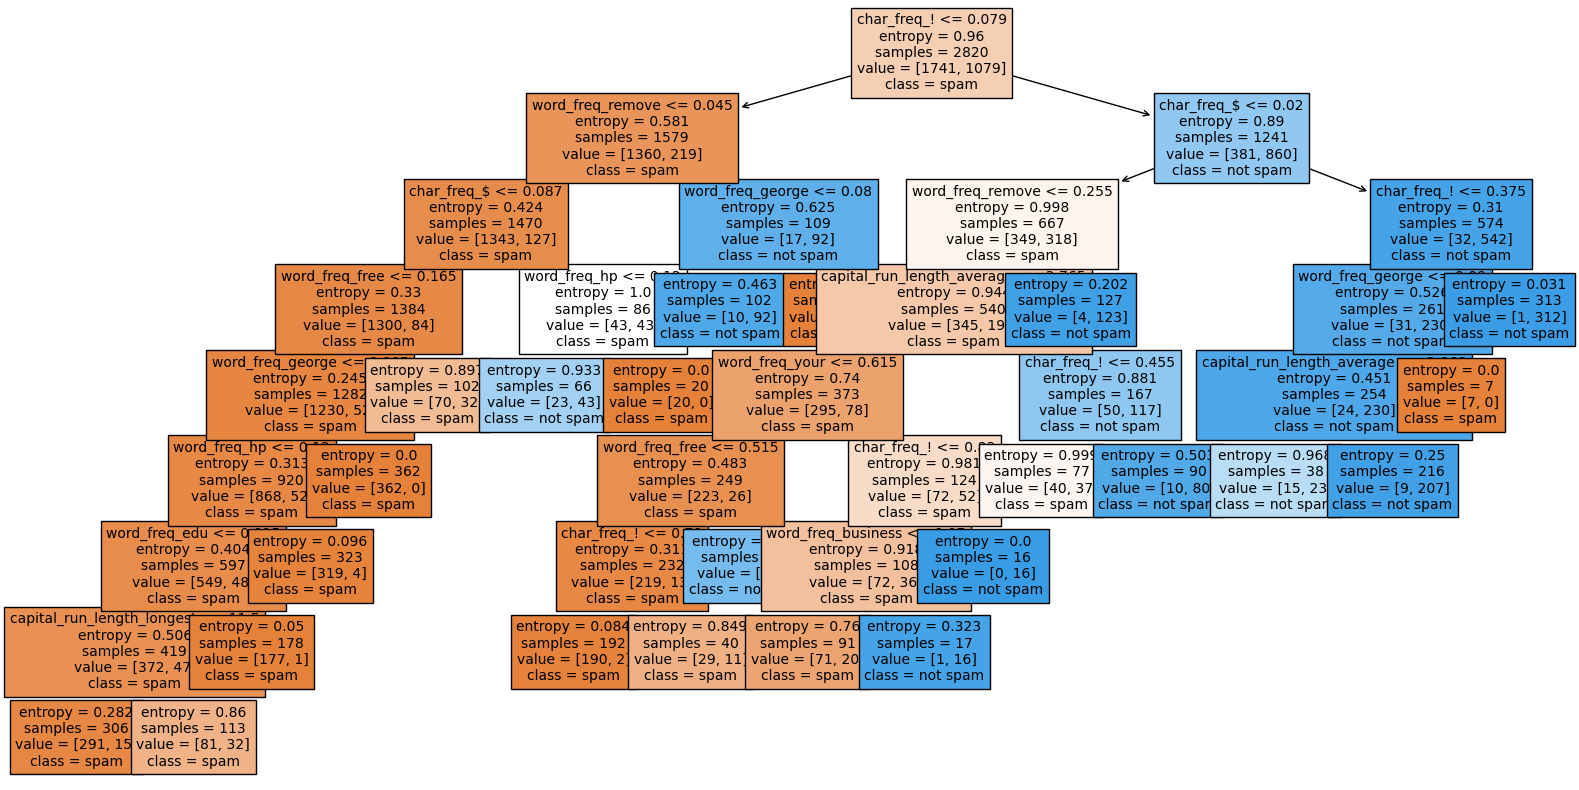

In [397]:
fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model_pruned, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

### Without strongly correlated features

In [398]:
data = X_no_strong_corr
target = df_new['spam']
feat_names = X_no_strong_corr.columns
targ_names = ['spam', 'not spam']
print(data.shape)

X_train, X_test, y_train, y_test = X_train_no_corr, X_test_no_corr, y_train_no_corr, y_test_no_corr 
print(X_train.shape)

(4210, 55)
(2820, 55)


training accuracy: 0.999645390070922
testing accuracy: 0.9100719424460432

Depth is 24
Number of leafes: 169



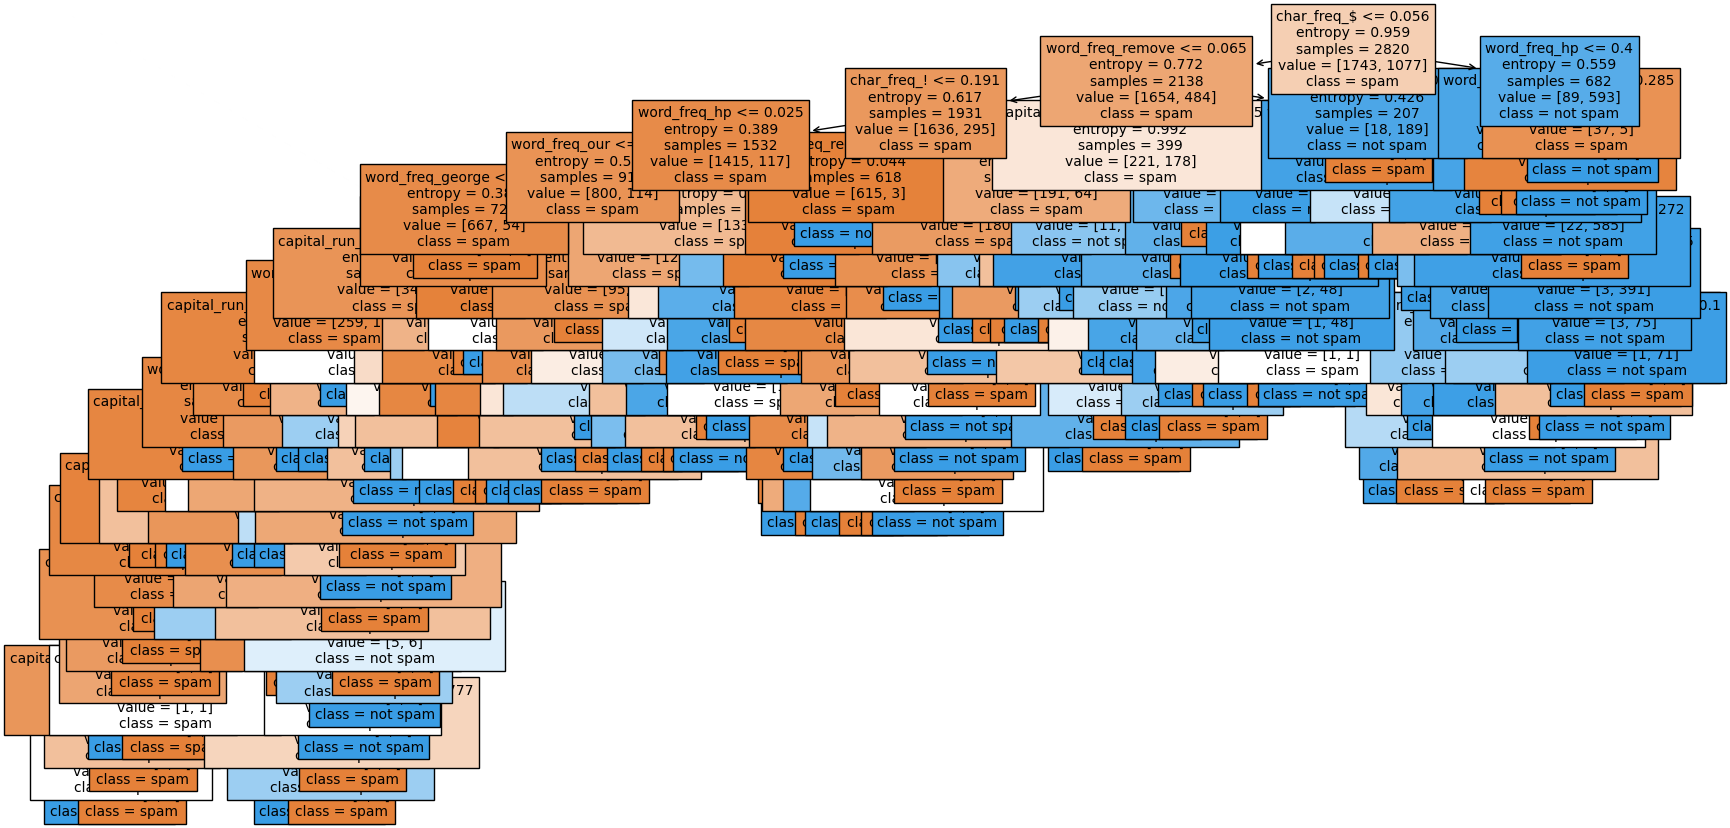

In [399]:
tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(X_train, y_train)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)

training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)

print(f'training accuracy: {training_acc}\ntesting accuracy: {testing_acc}')

print('\nDepth is',tree_model.tree_.max_depth + 1)
print(f'Number of leafes: {tree_model.tree_.n_leaves}\n')

fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

Apply the cost complexity pruning in order to avoid overfitting and make model more generalized

In [400]:
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00026769 0.00044153 0.00050447 0.00069151 0.00070922
 0.00070922 0.00070922 0.00070922 0.00070922 0.00070922 0.00075947
 0.00080307 0.00094669 0.00097691 0.00097691 0.00097691 0.00097691
 0.00097691 0.00097691 0.00097691 0.00097691 0.0009857  0.00105922
 0.00108422 0.0011275  0.00115075 0.00115075 0.00116559 0.00120444
 0.00120919 0.00121015 0.00121948 0.00128001 0.00129019 0.00137103
 0.00138303 0.0014036  0.00141744 0.00141844 0.00143876 0.00144147
 0.00144482 0.00147891 0.00150066 0.00154343 0.00160614 0.00164126
 0.0017307  0.00177998 0.00181886 0.00182869 0.001843   0.00187695
 0.00189864 0.0019137  0.0019457  0.00195382 0.0019978  0.00211608
 0.00214672 0.00219842 0.00222892 0.00227576 0.00233795 0.00235994
 0.00236577 0.00236772 0.00244228 0.00244318 0.00249948 0.00250984
 0.00253772 0.00254371 0.00254494 0.00259884 0.0028744  0.00289799
 0.00292579 0.00295545 0.00349528 0.00355498 0.0035763  0.00358614
 0.00364062 0.00381083 0.00395556 0.00409676 0.00432829 0.0044

In [401]:
# For each alpha we will append our model to a list

tree_models = []
for ccp_alpha in ccp_alphas:
    tree_model = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha=ccp_alpha)
    tree_model.fit(X_train, y_train)
    tree_models.append(tree_model)    

We will remove the last element in tree_models and ccp_alphas, because it is the trivial tree with only one node.

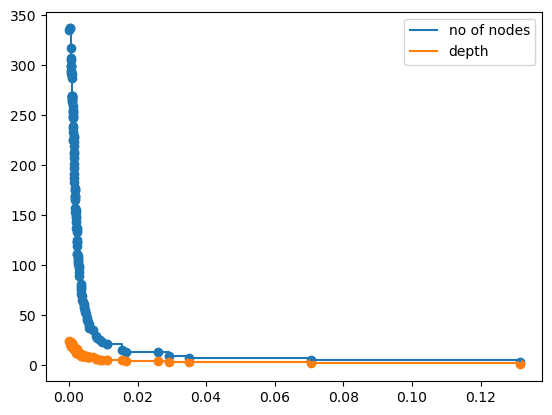

In [402]:
tree_models = tree_models[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [tree_model.tree_.node_count for tree_model in tree_models]
depth = [tree_model.tree_.max_depth for tree_model in tree_models]

plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

Observation: As alpha increases number of nodes and depth decreases

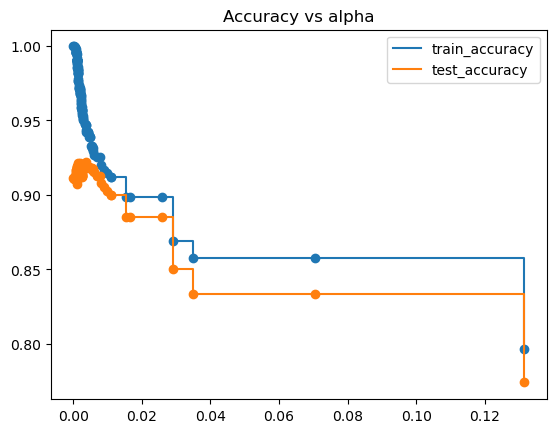

In [403]:
train_acc = []
test_acc = []
for t in tree_models:
    y_train_pred = t.predict(X_train)
    y_test_pred = t.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We can choose alpha = 0.025????????

Now we can obtain pruned decision tree with less amount of leaves and less depth

In [404]:
tree_model_pruned = tree.DecisionTreeClassifier(criterion = 'entropy',ccp_alpha = 0.025)
tree_model_pruned.fit(X_train,y_train)
y_train_pred = tree_model_pruned.predict(X_train)
y_test_pred = tree_model_pruned.predict(X_test)

Train Confusion matrix


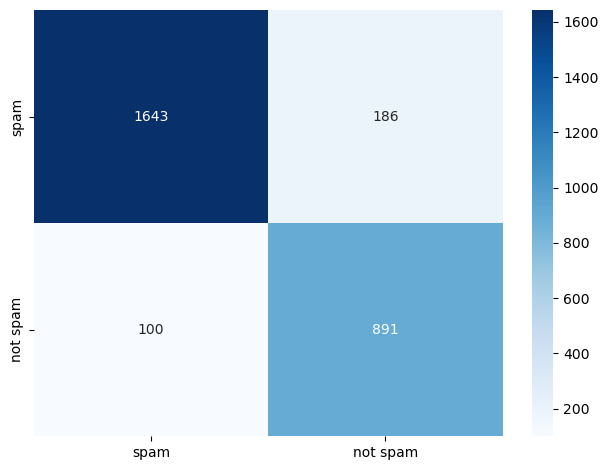

Test Confusion matrix


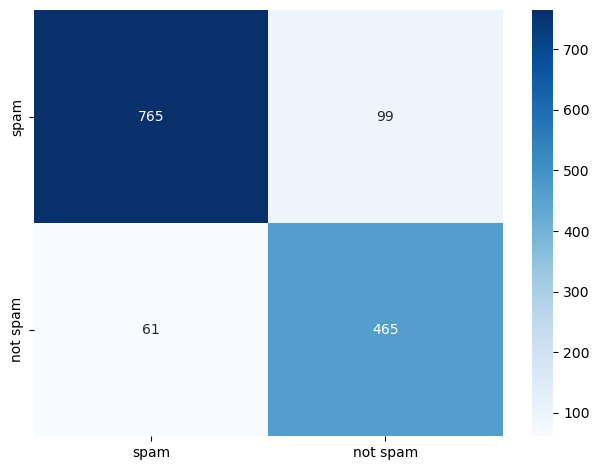

In [405]:
plot_confusionmatrix(y_train_pred,y_train,dom = 'Train')
plot_confusionmatrix(y_test_pred,y_test,dom = 'Test')

Train score: 0.898581560283688
Test score: 0.8848920863309353

Depth is 5
Number of leafes: 7



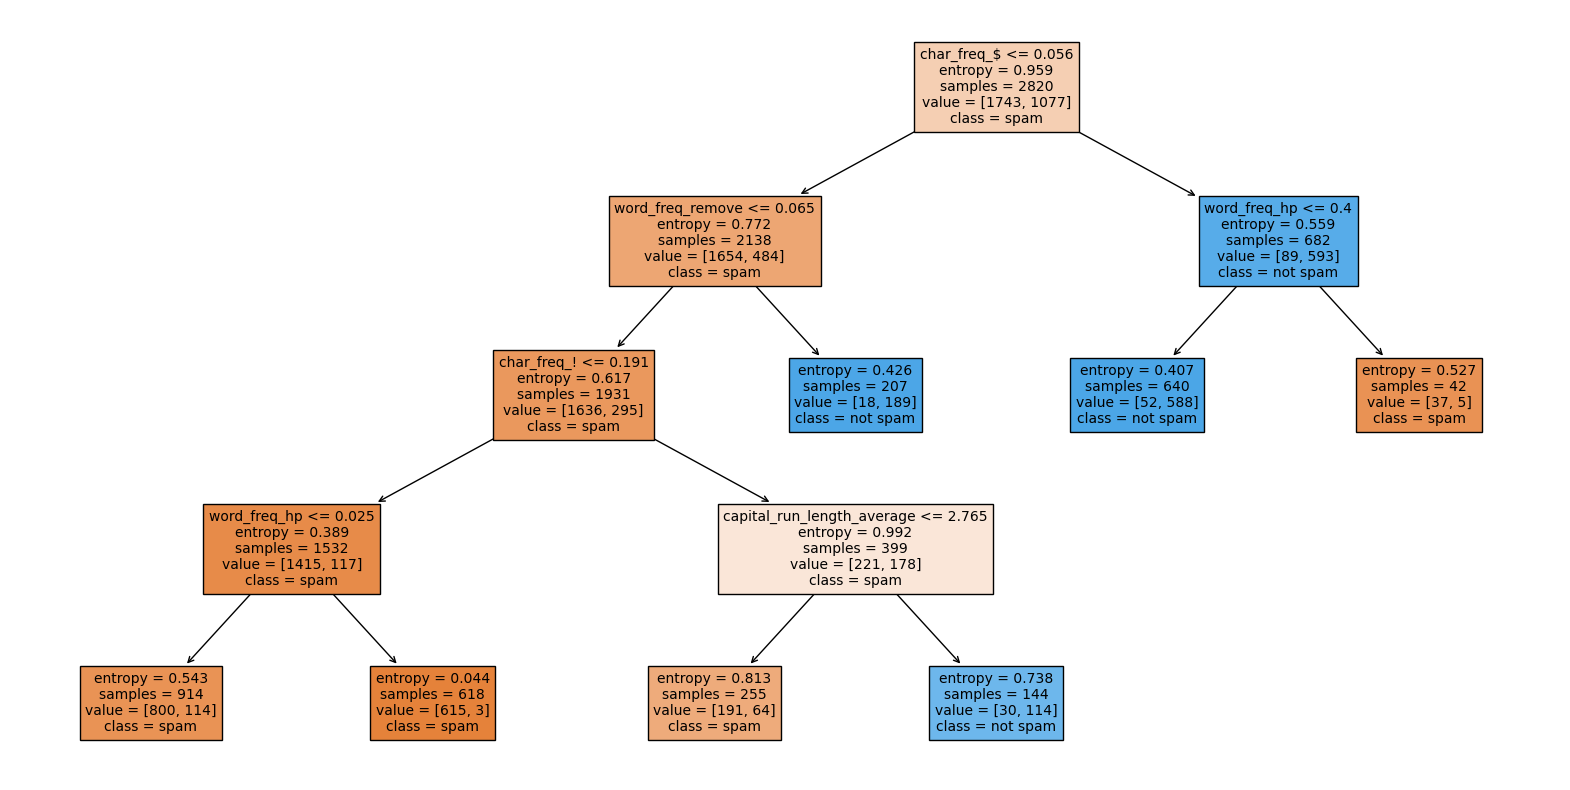

In [406]:
print(f'Train score: {accuracy_score(y_train_pred,y_train)}')
print(f'Test score: {accuracy_score(y_test_pred,y_test)}')

print('\nDepth is', tree_model_pruned.tree_.max_depth + 1)
print(f'Number of leafes: {tree_model_pruned.tree_.n_leaves}\n')

fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model_pruned, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

### After PCA

(4210, 4)
(2820, 4)

training accuracy: 0.999290780141844
testing accuracy: 0.8201438848920863

Depth is 22
Number of leafes: 352



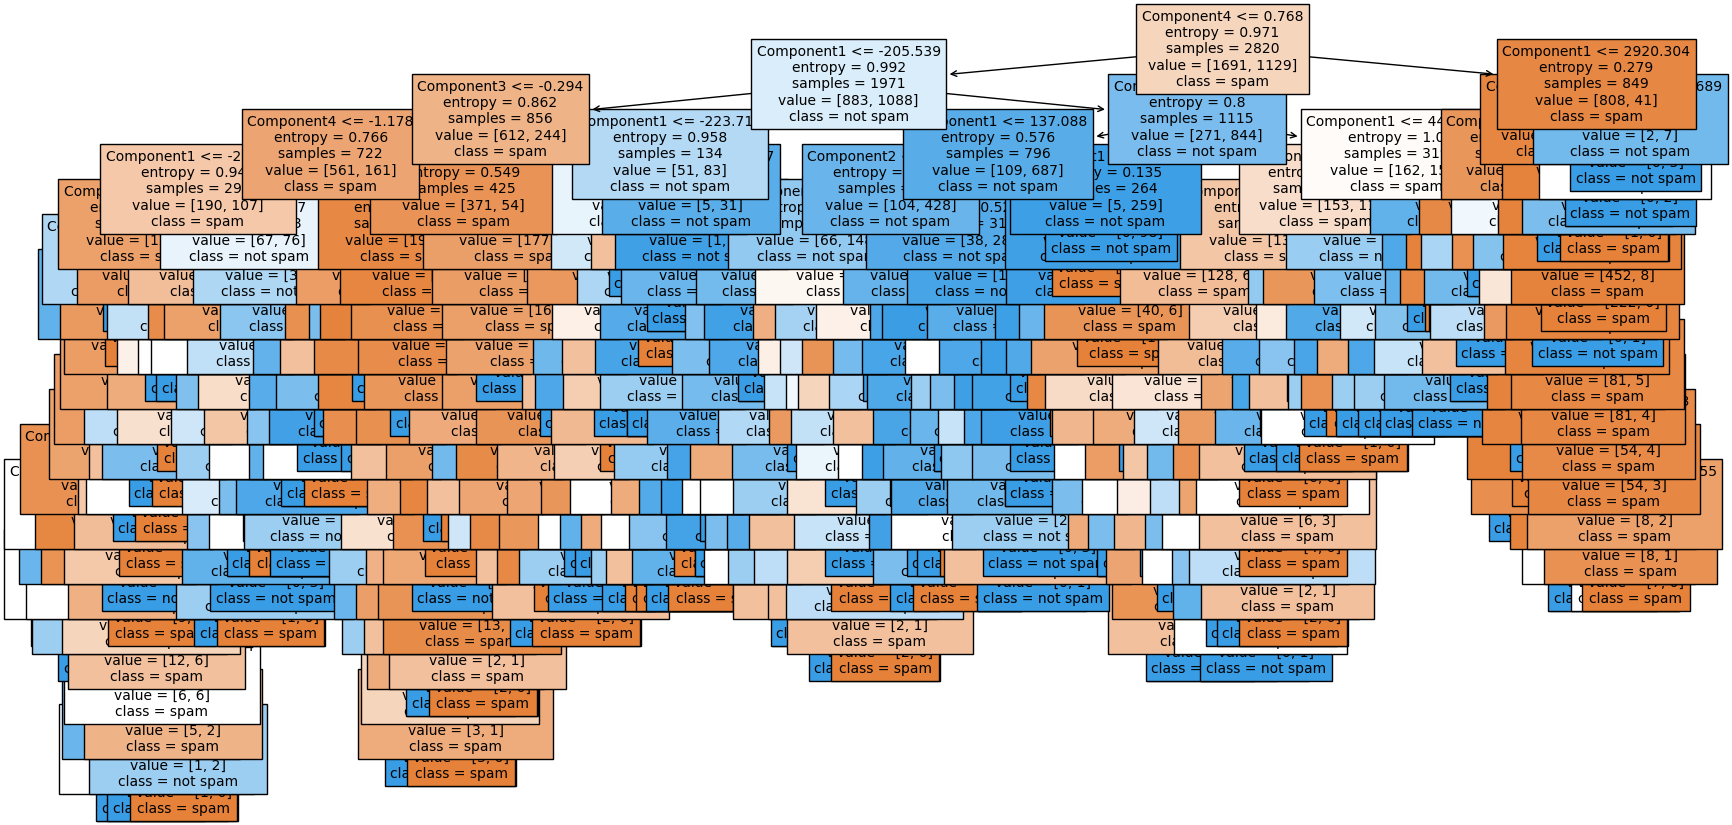

In [407]:
data = df_pca.drop(columns=['Result'])
target = df_pca['Result']
feat_names = df_pca.columns
targ_names = ['spam', 'not spam']
print(data.shape)

X_train, X_test, y_train, y_test = X_train_pca, X_test_pca, y_train_pca, y_test_pca 
print(X_train.shape)

tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(X_train, y_train)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)

training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)

print(f'\ntraining accuracy: {training_acc}\ntesting accuracy: {testing_acc}')

print('\nDepth is',tree_model.tree_.max_depth + 1)
print(f'Number of leafes: {tree_model.tree_.n_leaves}\n')

fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

Train a classification tree with postpruning with grid-search cross-validation on the cost complexity parameter

In [408]:
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00026769 0.00044153 0.00048846 0.00048846 0.00057537
 0.00064001 0.00064001 0.00064001 0.00067381 0.00069151 0.00070922
 0.00070922 0.00070922 0.00073268 0.00074463 0.00075947 0.00077101
 0.00078129 0.00079156 0.00081298 0.00085717 0.00086077 0.00086077
 0.00088306 0.00089692 0.0009215  0.00093979 0.00094563 0.00094563
 0.00094563 0.00095389 0.00097285 0.00097691 0.00097691 0.00097691
 0.00097691 0.00097691 0.00097691 0.00097691 0.00097691 0.00097691
 0.00097691 0.00098356 0.0009879  0.0009992  0.00101941 0.00104172
 0.00104451 0.00104451 0.00105006 0.0010522  0.00105953 0.00107076
 0.00110354 0.00111268 0.00111695 0.0011215  0.0011477  0.00115075
 0.00115075 0.00115075 0.00115075 0.00115075 0.00115075 0.00116559
 0.00117035 0.00120919 0.00120919 0.00121177 0.00121502 0.00121948
 0.00122085 0.00123235 0.00123767 0.00123767 0.00124566 0.0012498
 0.00126072 0.00128001 0.00128001 0.00130943 0.00131543 0.00131759
 0.00132459 0.00132459 0.00133043 0.00135381 0.00135701 0.00137

In [409]:
# For each alpha we will append our model to a list

tree_models = []
for ccp_alpha in ccp_alphas:
    tree_model = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha=ccp_alpha)
    tree_model.fit(X_train, y_train)
    tree_models.append(tree_model)    

We will remove the last element in tree_models and ccp_alphas, because it is the trivial tree with only one node.

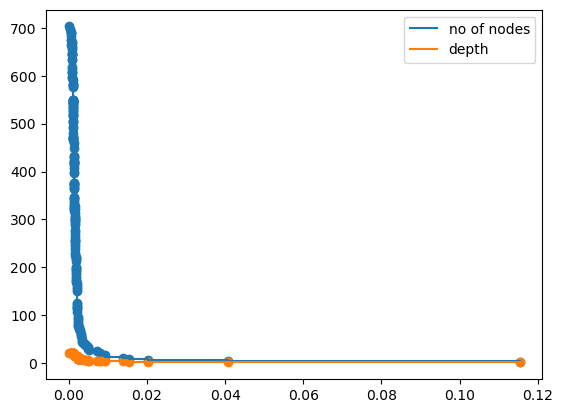

In [410]:
tree_models = tree_models[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [tree_model.tree_.node_count for tree_model in tree_models]
depth = [tree_model.tree_.max_depth for tree_model in tree_models]

plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

Observation: As alpha increases number of nodes and depth decreases. But from some point (alpha = 0.04) the depth and number of nodes remain to be the same.

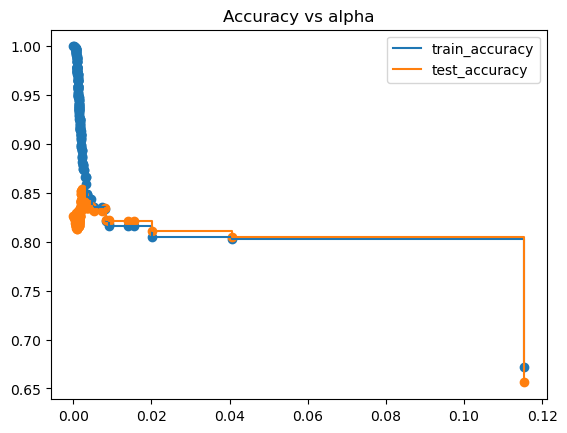

In [411]:
train_acc = []
test_acc = []
for t in tree_models:
    y_train_pred = t.predict(X_train)
    y_test_pred = t.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We can choose alpha = 0.0025 (in order to get higher accuracy)

Now we can obtain pruned decision tree with less amount of leaves and less depth

In [412]:
tree_model_pruned = tree.DecisionTreeClassifier(criterion = 'entropy',ccp_alpha = 0.0025)
tree_model_pruned.fit(X_train,y_train)
y_train_pred = tree_model_pruned.predict(X_train)
y_test_pred = tree_model_pruned.predict(X_test)

Train Confusion matrix


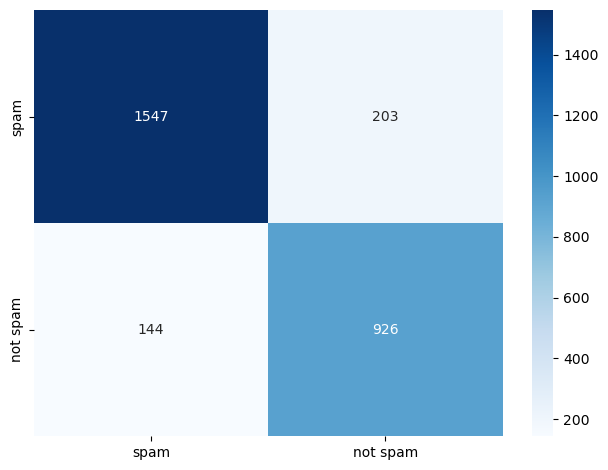

Test Confusion matrix


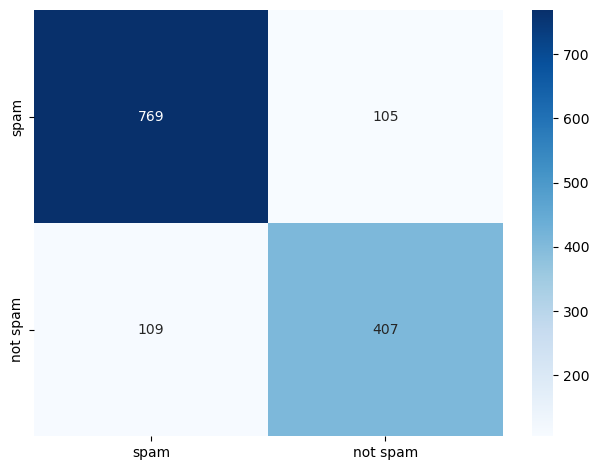

In [413]:
plot_confusionmatrix(y_train_pred,y_train,dom = 'Train')
plot_confusionmatrix(y_test_pred,y_test,dom = 'Test')

Train score: 0.8769503546099291
Test score: 0.8460431654676259

Depth is 9
Number of leafes: 38



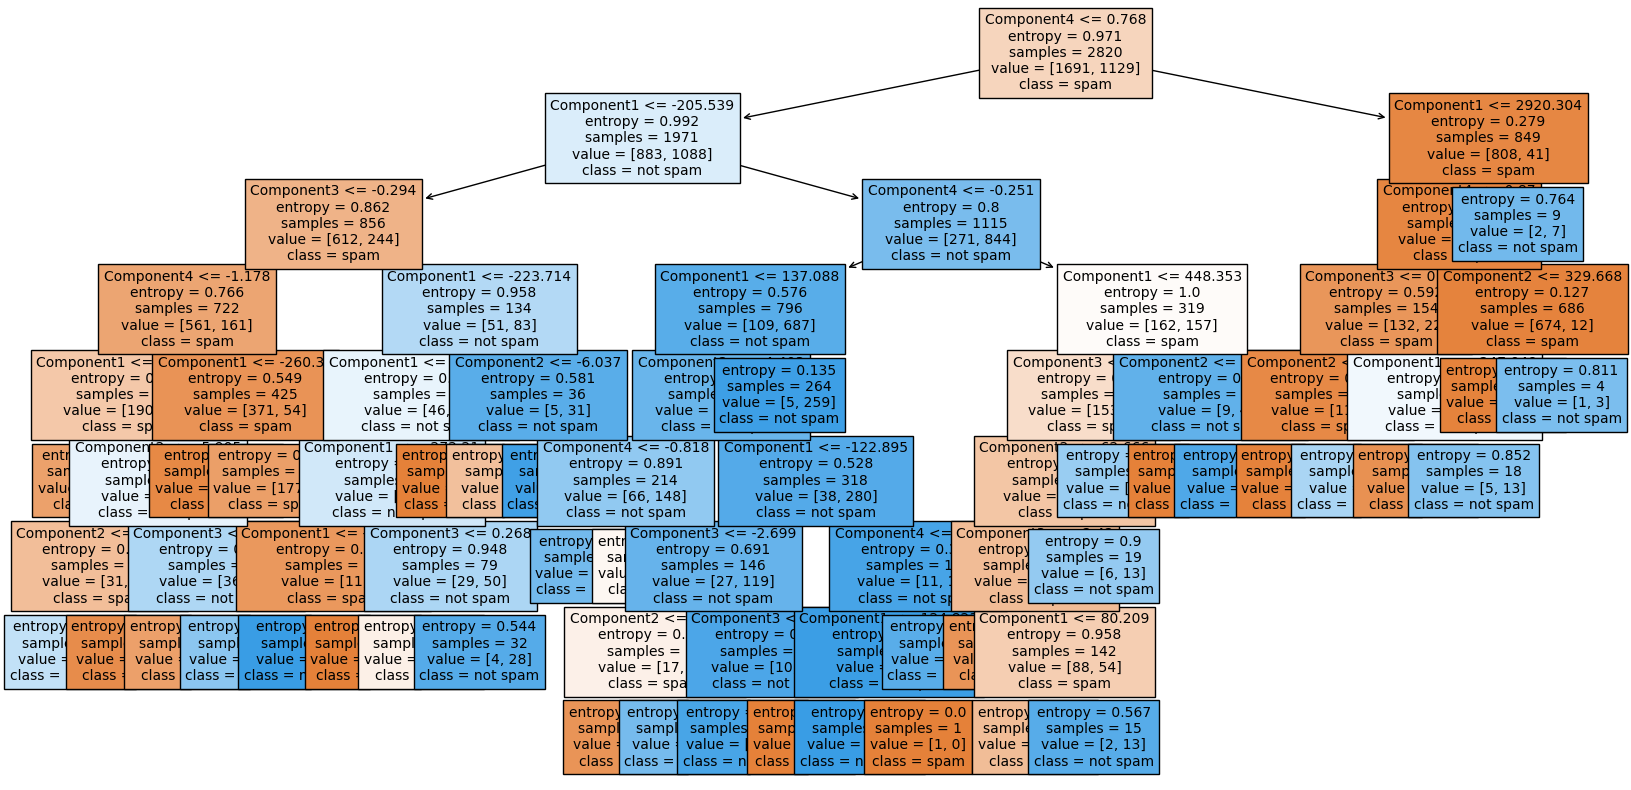

In [414]:
print(f'Train score: {accuracy_score(y_train_pred,y_train)}')
print(f'Test score: {accuracy_score(y_test_pred,y_test)}')

print('\nDepth is', tree_model_pruned.tree_.max_depth + 1)
print(f'Number of leafes: {tree_model_pruned.tree_.n_leaves}\n')

fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model_pruned, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

### Using feachers chosen with SelectFromModel

In [415]:
data = X_SFM
target = y_SFM
feat_names = X_SFM.columns
targ_names = ['spam', 'not spam']
print(data.shape)

X_train, X_test, y_train, y_test = X_train_SFM, X_test_SFM, y_train_SFM, y_test_SFM 
print(X_train.shape)

(4210, 11)
(2820, 11)


training accuracy: 0.9975177304964539
testing accuracy: 0.9136690647482014

Depth is 23
Number of leafes: 219



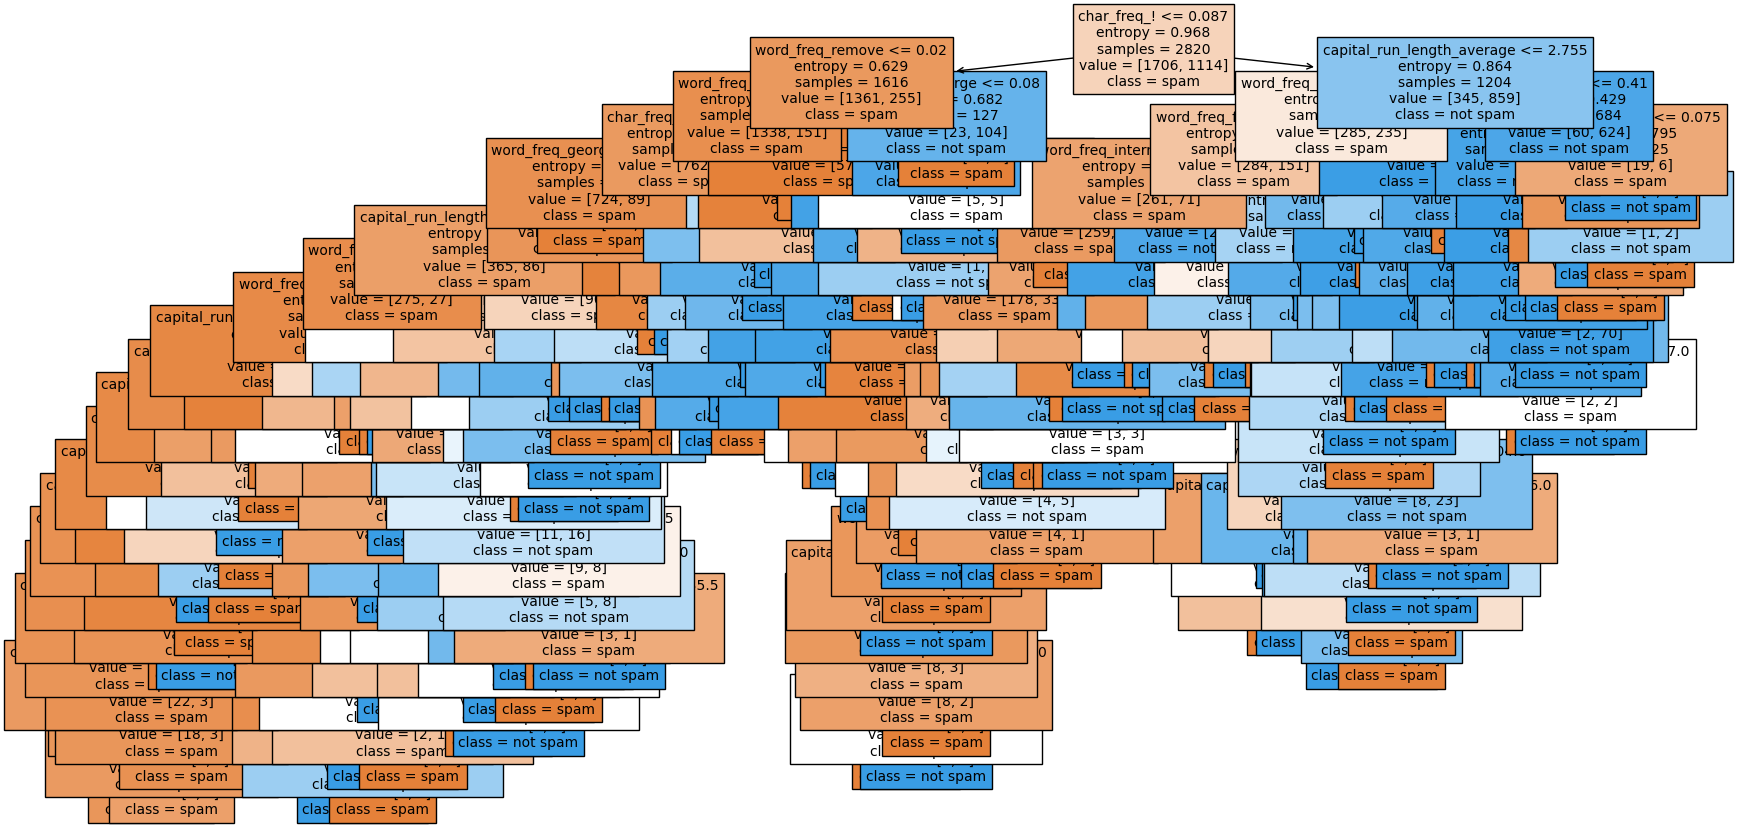

In [416]:
tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(X_train, y_train)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)

training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)

print(f'training accuracy: {training_acc}\ntesting accuracy: {testing_acc}')

print('\nDepth is',tree_model.tree_.max_depth + 1)
print(f'Number of leafes: {tree_model.tree_.n_leaves}\n')

fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

Apply the cost complexity pruning in order to avoid overfitting and make model more generalized

In [417]:
path = tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 1.73472111e-05 1.73472111e-05 3.38774034e-05
 1.62187348e-04 2.13632509e-04 2.67690604e-04 4.72813239e-04
 5.35381207e-04 5.50912390e-04 6.06207782e-04 6.40007176e-04
 6.77061364e-04 6.87907697e-04 7.09219858e-04 7.09219858e-04
 7.09219858e-04 7.09219858e-04 7.32682846e-04 8.15200585e-04
 8.32806931e-04 8.60771804e-04 9.60201234e-04 9.76910462e-04
 9.76910462e-04 9.76910462e-04 9.76910462e-04 9.76910462e-04
 9.76910462e-04 9.76910462e-04 9.76910462e-04 1.00212282e-03
 1.01559205e-03 1.01728459e-03 1.02821092e-03 1.03704441e-03
 1.06424794e-03 1.07399020e-03 1.07986400e-03 1.08390844e-03
 1.14158899e-03 1.14769574e-03 1.15074911e-03 1.15074911e-03
 1.15074911e-03 1.15074911e-03 1.15074911e-03 1.15102358e-03
 1.16558740e-03 1.20987157e-03 1.21834790e-03 1.23766844e-03
 1.24066813e-03 1.24091040e-03 1.27905681e-03 1.28001435e-03
 1.28001435e-03 1.28001435e-03 1.32458776e-03 1.32872864e-03
 1.33822449e-03 1.34068960e-03 1.34755460e-03 1.38302643e-03
 1.38302643e-03 1.393436

In [418]:
# For each alpha we will append our model to a list

tree_models = []
for ccp_alpha in ccp_alphas:
    tree_model = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha=ccp_alpha)
    tree_model.fit(X_train, y_train)
    tree_models.append(tree_model)    

We will remove the last element in tree_models and ccp_alphas, because it is the trivial tree with only one node.

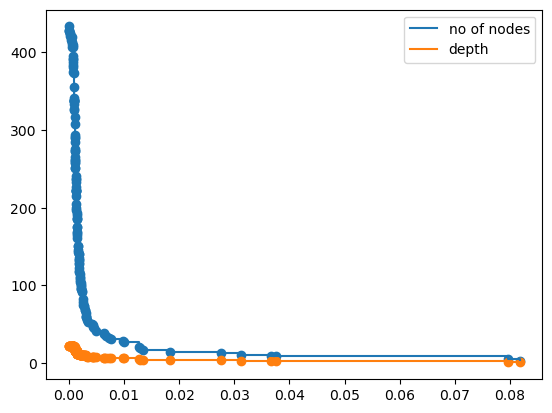

In [419]:
tree_models = tree_models[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [tree_model.tree_.node_count for tree_model in tree_models]
depth = [tree_model.tree_.max_depth for tree_model in tree_models]

plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

Observation: As alpha increases number of nodes and depth decreases. But from some point (alpha = 0.04) the depth and number of nodes remain to be the same.

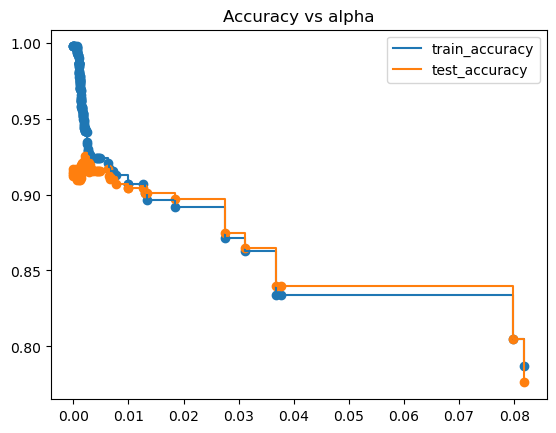

In [420]:
train_acc = []
test_acc = []
for t in tree_models:
    y_train_pred = t.predict(X_train)
    y_test_pred = t.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We can choose alpha = 0.008 (in order to get higher accuracy)

Now we can obtain pruned decision tree with less amount of leaves and less depth

In [421]:
tree_model_pruned = tree.DecisionTreeClassifier(criterion = 'entropy',ccp_alpha = 0.008)
tree_model_pruned.fit(X_train,y_train)
y_train_pred = tree_model_pruned.predict(X_train)
y_test_pred = tree_model_pruned.predict(X_test)

Train Confusion matrix


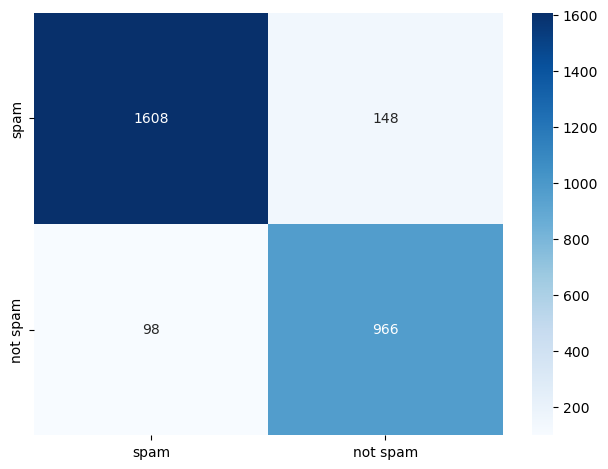

Test Confusion matrix


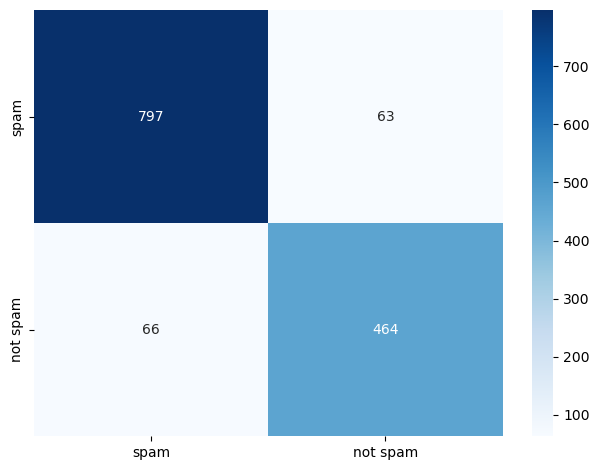

In [422]:
plot_confusionmatrix(y_train_pred,y_train,dom = 'Train')
plot_confusionmatrix(y_test_pred,y_test,dom = 'Test')

Train score: 0.9127659574468086
Test score: 0.9071942446043165

Depth is 8
Number of leafes: 16



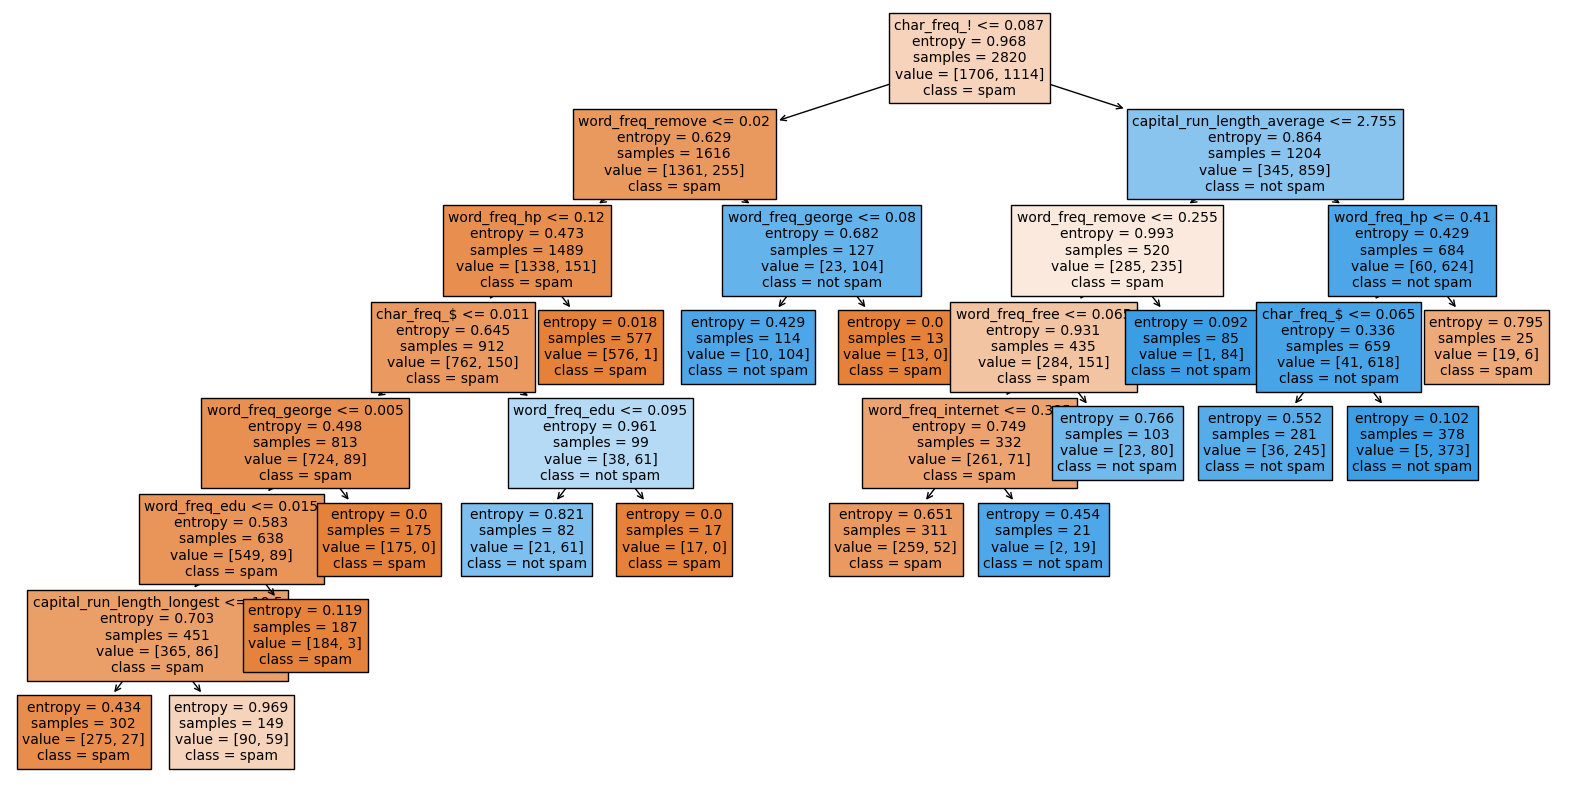

In [423]:
print(f'Train score: {accuracy_score(y_train_pred,y_train)}')
print(f'Test score: {accuracy_score(y_test_pred,y_test)}')

print('\nDepth is', tree_model_pruned.tree_.max_depth + 1)
print(f'Number of leafes: {tree_model_pruned.tree_.n_leaves}\n')

fig, ax = plt.subplots(figsize=(20, 10))  
plot_tree(tree_model_pruned, ax=ax, fontsize=10, \
          feature_names=feat_names, class_names=targ_names, filled=True)
plt.show()

# Support vector machine (classification)

### Hyperparameter Optimization using GridSearch CV

In [426]:
# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto

svc=SVC() 


# declare parameters for hyperparameter tuning

parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

In [ ]:
grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

In [51]:
cols = df_no_result.columns
cols

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [46]:
scaler = StandardScaler()

def normalize_train_test(X, y, testsize):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testsize)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

In [47]:
X_train, X_test, y_train, y_test = normalize_train_test(df_no_result, df_new['spam'], 0.33)

In [56]:
pd.DataFrame(X_train, columns = [cols]).describe()

word_freq_make word_freq_address word_freq_all  word_freq_3d  \
count   2.820000e+03      2.820000e+03  2.820000e+03  2.820000e+03   
mean   -2.871423e-16      2.041511e-16  2.781857e-16 -1.677293e-16   
std     1.000177e+00      1.000177e+00  1.000177e+00  1.000177e+00   
min    -3.612445e-01     -2.818448e-01 -5.693127e-01 -4.781708e-02   
25%    -3.612445e-01     -2.818448e-01 -5.693127e-01 -4.781708e-02   
50%    -3.612445e-01     -2.818448e-01 -5.693127e-01 -4.781708e-02   
75%    -3.612445e-01     -2.818448e-01  3.107908e-01 -4.781708e-02   
max     1.568317e+01      1.803181e+01  9.188356e+00  2.692606e+01   

      word_freq_our word_freq_over word_freq_remove word_freq_internet  \
count  2.820000e+03   2.820000e+03     2.820000e+03       2.820000e+03   
mean   2.342492e-18   1.069279e-16    -5.606233e-17      -6.368822e-16   
std    1.000177e+00   1.000177e+00     1.000177e+00       1.000177e+00   
min   -4.605354e-01  -3.505474e-01    -2.907407e-01      -2.890017e-01   
25%   -4.605354e-01  -3.505474e-01    -2.907407e-01      -2.890017e-01   
50%   -4.605354e-01  -3.505474e-01    -2.907407e-01      -2.890017e-01   
75%    1.001829e-01  -3.505474e-01    -2.907407e-01      -2.890017e-01   
max    1.260851e+01   2.153520e+01     1.713891e+01       1.668564e+01   

      word_freq_order word_freq_mail  ... word_freq_conference   char_freq_;  \
count    2.820000e+03   2.820000e+03  ...         2.820000e+03  2.820000e+03   
mean    -2.937957e-16   2.474971e-16  ...        -5.495013e-17 -8.307972e-17   
std      1.000177e+00   1.000177e+00  ...         1.000177e+00  1.000177e+00   
min     -3.363276e-01  -3.958645e-01  ...        -1.110810e-01 -1.581831e-01   
25%     -3.363276e-01  -3.958645e-01  ...        -1.110810e-01 -1.581831e-01   
50%     -3.363276e-01  -3.958645e-01  ...        -1.110810e-01 -1.581831e-01   
75%     -3.363276e-01  -9.963525e-02  ...        -1.110810e-01 -1.581831e-01   
max      1.156928e+01   1.763760e+01  ...         3.488091e+01  1.722223e+01   

        char_freq_(   char_freq_[   char_freq_!   char_freq_$   char_freq_#  \
count  2.820000e+03  2.820000e+03  2.820000e+03  2.820000e+03  2.820000e+03   
mean   1.379314e-16  2.049188e-17  1.083629e-15 -2.907643e-16 -2.062623e-16   
std    1.000177e+00  1.000177e+00  1.000177e+00  1.000177e+00  1.000177e+00   
min   -4.967379e-01 -1.479381e-01 -3.045546e-01 -3.167549e-01 -9.995011e-02   
25%   -4.967379e-01 -1.479381e-01 -3.045546e-01 -3.167549e-01 -9.995011e-02   
50%   -2.446375e-01 -1.479381e-01 -2.833857e-01 -3.167549e-01 -9.995011e-02   
75%    1.721685e-01 -1.479381e-01  5.830252e-02 -9.918770e-02 -9.995011e-02   
max    3.228304e+01  3.530157e+01  3.495311e+01  2.432581e+01  3.822594e+01   

      capital_run_length_average capital_run_length_longest  \
count               2.820000e+03               2.820000e+03   
mean                1.307563e-17              -6.377877e-18   
std                 1.000177e+00               1.000177e+00   
min                -1.395073e-01              -2.359199e-01   
25%                -1.201250e-01              -2.097566e-01   
50%                -9.980674e-02              -1.748722e-01   
75%                -5.793244e-02              -4.841608e-02   
max                 3.311539e+01               4.331730e+01   

      capital_run_length_total  
count             2.820000e+03  
mean             -4.901517e-17  
std               1.000177e+00  
min              -4.660133e-01  
25%              -4.023024e-01  
50%              -3.035504e-01  
75%              -2.003675e-02  
max               2.476352e+01  

[8 rows x 57 columns]